## **The Angular Correlation Function**

The angular correlation function is a statistical tool used in cosmology to quantify the clustering of galaxies in the universe. It measures the probability of finding a galaxy at a certain angular separation from another galaxy, compared to a random distribution.

**How it Works:**

1. **Galaxy Catalog:** Astronomers create a catalog of galaxies, recording their positions on the celestial sphere.
2. **Pair Counting:** They then calculate the number of galaxy pairs separated by a specific angular distance.
3. **Comparison to Random:** This number is compared to the expected number of pairs in a random distribution of galaxies.
4. **Correlation Function:** The angular correlation function, often denoted as w(θ), quantifies the excess or deficit of galaxy pairs at different angular separations.

**What it Tells Us:**

* **Large-Scale Structure:** A high value of w(θ) at large angular separations indicates that galaxies are clustered together on large scales.
* **Small-Scale Structure:** A high value of w(θ) at small angular separations suggests that galaxies form groups and clusters.
* **Cosmological Parameters:** By studying the angular correlation function at various scales, cosmologists can constrain cosmological parameters like the matter density and dark energy density of the universe.

**Visualizing the Angular Correlation Function:**

[Image of angular correlation function plot]

**Applications:**

* **Understanding Cosmic Structure Formation:** The angular correlation function provides insights into the processes that led to the formation of galaxies and large-scale structures.
* **Testing Cosmological Models:** By comparing the observed angular correlation function with predictions from different cosmological models, scientists can test the validity of these models.
* **Dark Matter and Dark Energy:** The angular correlation function can help constrain the properties of dark matter and dark energy, which make up most of the universe's mass and energy.

In summary, the angular correlation function is a powerful tool for understanding the large-scale structure of the universe and the underlying physics that governs its evolution.


## **r0: A Measure of Clustering Strength**

In the context of galaxy clustering, r0 is a parameter that quantifies the strength of clustering among galaxies. It represents the characteristic scale over which galaxy clustering occurs.

**How r0 Changes with Redshift and Stellar Mass:**

1. **Redshift Dependence:**

   * **Higher Redshift:** At higher redshifts (earlier cosmic times), galaxies tend to be more clustered. This is because the universe was denser in the past, leading to stronger gravitational forces that pulled galaxies together. As a result, the value of r0 is typically higher at higher redshifts.
   * **Lower Redshift:** As the universe expands and becomes less dense, the clustering strength decreases. This translates to a smaller value of r0 at lower redshifts.

2. **Stellar Mass Dependence:**

   * **Massive Galaxies:** More massive galaxies tend to be more strongly clustered than less massive galaxies. This is because they have deeper gravitational potentials, which attract and retain more matter. As a result, massive galaxies are more likely to reside in dense environments like galaxy clusters. Consequently, the value of r0 is generally higher for massive galaxies.
   * **Less Massive Galaxies:** Less massive galaxies, on the other hand, are less clustered and tend to be found in less dense environments. This leads to a smaller value of r0 for less massive galaxies.

**Understanding the Implications:**

By studying how r0 varies with redshift and stellar mass, astronomers can gain insights into the formation and evolution of galaxies and the large-scale structure of the universe. For example, a higher value of r0 at a particular redshift and stellar mass range suggests that galaxies in that epoch were more efficient at forming and growing. 

Furthermore, the evolution of r0 with redshift can provide clues about the nature of dark matter and dark energy, which are believed to play a crucial role in shaping the cosmic structure.


**Visualizing the Characteristic Scale:**

Imagine a cosmic web, where galaxies are interconnected like nodes in a network. The characteristic scale would represent the average distance between these nodes. In regions with strong clustering, the nodes are closer together, leading to a larger r0. In regions with weaker clustering, the nodes are more spread out, resulting in a smaller r0.

In [2]:
import astropy.io.fits as fits
import numpy as np
import scipy.integrate as integrate
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table,join
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM
import treecorr
import pymc as pm
import arviz as az


home_dir = os.path.expanduser('~')
thesis_path = os.path.join(home_dir, 'Master_Thesis', 'DATA')



# My catalog
fits_file_path = os.path.join(thesis_path, "Y3_deep_fields_DB_wKNN_cat_SN-C3_zm.fits")  
t= Table.read(fits_file_path)
masked = os.path.join(thesis_path, "SN-C3_masked_cat.fits")  

t3= Table.read(masked)


t=join(t,t3,keys='id')


t.rename_column('ra_1','ra')
t.rename_column('dec_1','dec')



#Randoms
fits_random = os.path.join(thesis_path, "SN-C3_randoms_ugriz_trim_video.fits") 

# Open the FITS file using astropy.io.fits
hdulist = fits.open(fits_random)
hdulist.info()

t2= Table.read(fits_random)






Filename: /home/astro/manasoi7/Master_Thesis/DATA/SN-C3_randoms_ugriz_trim_video.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SN-C3_C01_randoms_raw.fits    1 BinTableHDU     18   13402307R x 3C   [E, E, 9A]   


z_mean: 0.5
SM_mean: 9.333333333333332
SM_mean: 10.0
SM_mean: 10.666666666666668
z_mean: 0.7
SM_mean: 9.333333333333332
SM_mean: 10.0
SM_mean: 10.666666666666668
z_mean: 0.9
SM_mean: 9.333333333333332
SM_mean: 10.0
SM_mean: 10.666666666666668
z_mean: 1.1
SM_mean: 9.333333333333332
SM_mean: 10.0
SM_mean: 10.666666666666668
z_mean: 1.2999999999999998
SM_mean: 9.333333333333332
SM_mean: 10.0
SM_mean: 10.666666666666668


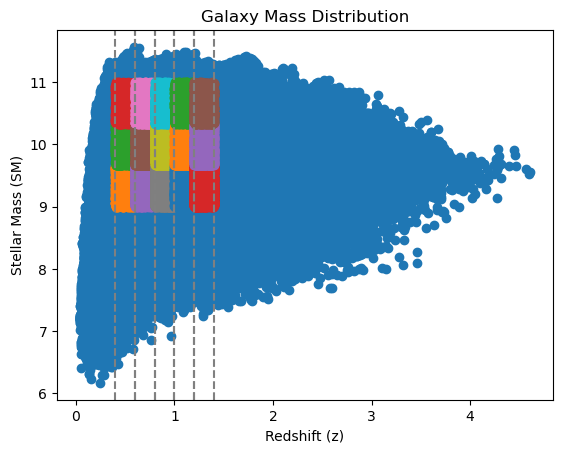

len(subsamples) 15


In [3]:
# Define the subsample regions
subsamples = []
z_mean_range=[]
SM_mean_range=[]


#z_values = [ 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9, 1.0]
#z_values = [ 0.5,0.6, 0.7, 0.8, 0.9, 1.0,1.1,1.2,1.3,1.4,1.5]

z_values = [ 0.4,0.6,0.8,1.0,1.2,1.4]



SM_range = np.linspace(9, 11, num=4)  # Create .. evenly spaced values from 8 to 11

for i in range(len(z_values) - 1):

    z_min = z_values[i]
    z_max = z_values[i + 1]
    z_mean= (z_min+z_max)/2
    print("z_mean:", z_mean)
    
    z_mean_range.append(z_mean)
    
    for j in range(len(SM_range) - 1):
        SM_min = SM_range[j]
        SM_max = SM_range[j+1]
        SM_mean= (SM_min+SM_max)/2
        print('SM_mean:', SM_mean)
        SM_mean_range.append(SM_mean)

        subsample = (t['z'] > z_min) & (t['z'] <= z_max) & (t['SM'] > SM_min) & (t['SM'] <= SM_max)
        subsamples.append(subsample)
        
        




plt.scatter(t['z'], t['SM'], label='All galaxies')

for i, subsample in enumerate(subsamples):
    z_subsample = t['z'][subsample]
    SM_subsample = t['SM'][subsample]


    plt.scatter(z_subsample, SM_subsample, label=f'Subsample {i+1}')
    
    
# Add dot-dashed lines for subsample regions
for i in range(len(z_values) - 1):
    z_min = z_values[i]
    z_max = z_values[i + 1]
    plt.axvline(z_min, linestyle='--', color='gray', label=f'Subsample {i+1} boundaries')
    plt.axvline(z_max, linestyle='--', color='gray')


plt.xlabel('Redshift (z)')
plt.ylabel('Stellar Mass (SM)')
plt.title('Galaxy Mass Distribution')
#plt.legend()
plt.show()
print("len(subsamples)",len(subsamples))

In [4]:
catalogs = []
for i, subsamples in enumerate(subsamples):
    ra_subset = t['ra'][subsamples]
    dec_subset = t['dec'][subsamples]

    catalog = SkyCoord(ra=ra_subset * u.deg, dec=dec_subset * u.deg)
    catalogs.append(catalog)


    N = len(catalog)
    print(f"Subsample {i+1}: N = {N}")
    


Subsample 1: N = 4086
Subsample 2: N = 2676
Subsample 3: N = 1764
Subsample 4: N = 6389
Subsample 5: N = 4632
Subsample 6: N = 2882
Subsample 7: N = 9885
Subsample 8: N = 5539
Subsample 9: N = 3725
Subsample 10: N = 10182
Subsample 11: N = 4802
Subsample 12: N = 3321
Subsample 13: N = 10587
Subsample 14: N = 4952
Subsample 15: N = 3024


In [5]:
def count_pairs_in_theta_bin(cat,theta_edges):
    """Counts the number of pairs of objects in a catalog that have an angular separation
    within a specified theta bin.

    Args:
        catalog: An astropy.coordinates.SkyCoord object containing object coordinates.
        theta_bins: A tuple defining the angular separation bin.

    Returns:
        The number of pairs within the theta bin.
    """
    separation = cat.separation(cat[:, np.newaxis]) # Calculates the angular separation between all pairs of objects in a catalog.
    theta_hist,_= np.histogram(np.log10(separation.value),bins=theta_edges)



    return theta_hist



theta_edges=np.linspace(-2.5,0.25,50) #-2.5 and 0.25 are log of the max and min separation in degrees
theta_cen= (theta_edges[:-1]+theta_edges[1:])/2



In [6]:
# Count galaxy pairs for each catalog
pair_counts = []
for catalog in catalogs:
    theta_edges = np.linspace(-2.5, 0.25, 50)  # Adjust theta_edges as needed
    dd_counts = count_pairs_in_theta_bin(catalog, theta_edges)
    pair_counts.append(dd_counts)

# Print or analyze the pair counts for each subsample
for i, counts in enumerate(pair_counts):
    print(f"Subsample {i+1}:")
    print(counts)
    

/tmp/ipykernel_1181686/3125284895.py:13: RuntimeWarning: divide by zero encountered in log10
  theta_hist,_= np.histogram(np.log10(separation.value),bins=theta_edges)


Subsample 1:
[    122     164     190     284     314     440     536     682     766
    1078    1386    1766    2094    2482    3276    4130    5060    6612
    8578   10634   12972   16348   20658   25846   33130   42288   52364
   65466   83568  104288  134638  172956  212426  257646  313468  383844
  480920  579028  684006  830746 1004486 1216884 1416300 1610094 1758454
 1727232 1561602 1158336  569046]
Subsample 2:
[    56     64     98    118    160    186    260    260    390    448
    586    732    984   1210   1460   1956   2268   2910   3510   4730
   5836   7186   9334  11634  14530  17840  22268  27976  35846  44850
  58636  74444  88888 109626 133092 164006 205282 243438 284974 348728
 419870 505516 595478 686062 759490 756236 688048 505890 258110]
Subsample 3:
[    32     46     46     48     68     80    100    170    124    178
    260    292    376    496    568    754    982   1138   1488   2104
   2634   3226   3932   4848   6598   7988   9834  12172  15068  18740


In [68]:
ra_2 = t2['ra']#[::1000]
dec_2 = t2['dec']#[::1000]
random_catalog=SkyCoord(ra=ra_2*u.deg, dec=dec_2*u.deg)


In [8]:
def calculate_2pcf(catalog, random_catalog, theta_edges):


    # Calculate DD counts
    dd_counts = count_pairs_in_theta_bin(catalog, theta_edges)

    # Calculate RR counts
    rr_counts = count_pairs_in_theta_bin(random_catalog, theta_edges)
    
    
    #Normalise
    norma_dd= dd_counts/np.sum(dd_counts) 
    norma_rr= rr_counts/np.sum(rr_counts) 


    # Calculate 2PCF
    two_pcf = (norma_dd / norma_rr) - 1 # w_measured

    return two_pcf






In [9]:


# Calculate 2PCF for each catalog
two_pcf_results = []
for catalog in catalogs:
    theta_edges = np.linspace(-2.5, 0.25, 50)  # Adjust theta_edges as needed
    two_pcf = calculate_2pcf(catalog, random_catalog, theta_edges)
    two_pcf_results.append(two_pcf)

    
# Print or analyze the 2PCF results for each subsample
#for i, two_pcf in enumerate(two_pcf_results):
    #print(f"Subsample {i+1}:")
    #print(two_pcf)
    #print(z_mean_range[i])


/tmp/ipykernel_1181686/3125284895.py:13: RuntimeWarning: divide by zero encountered in log10
  theta_hist,_= np.histogram(np.log10(separation.value),bins=theta_edges)


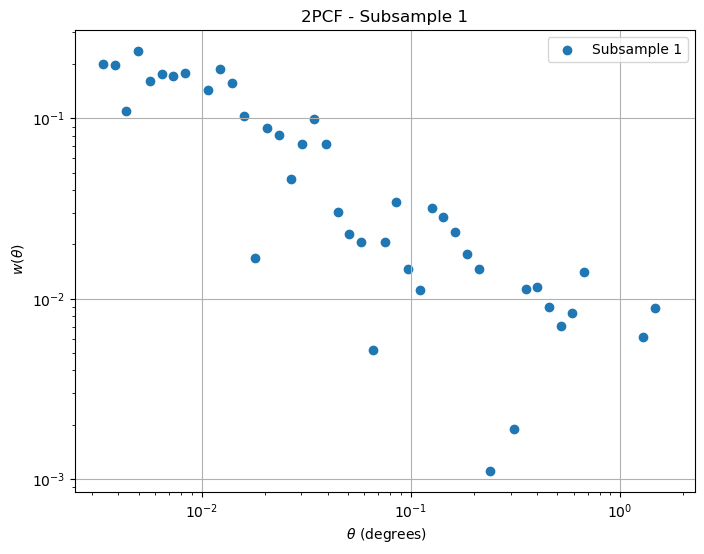

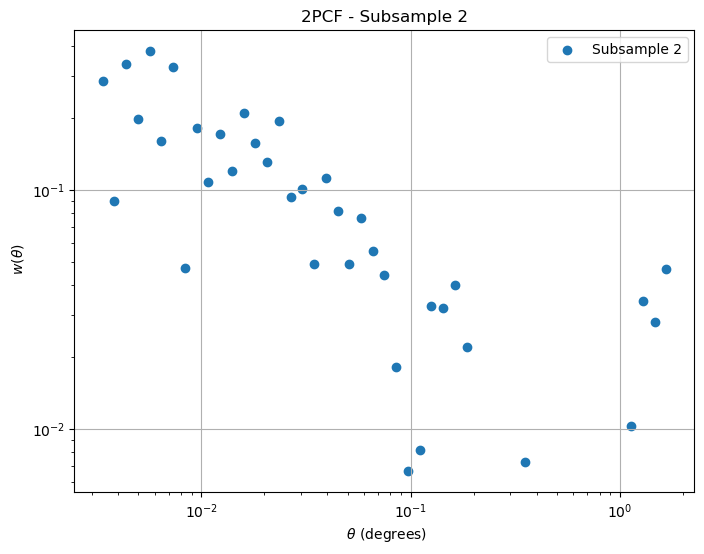

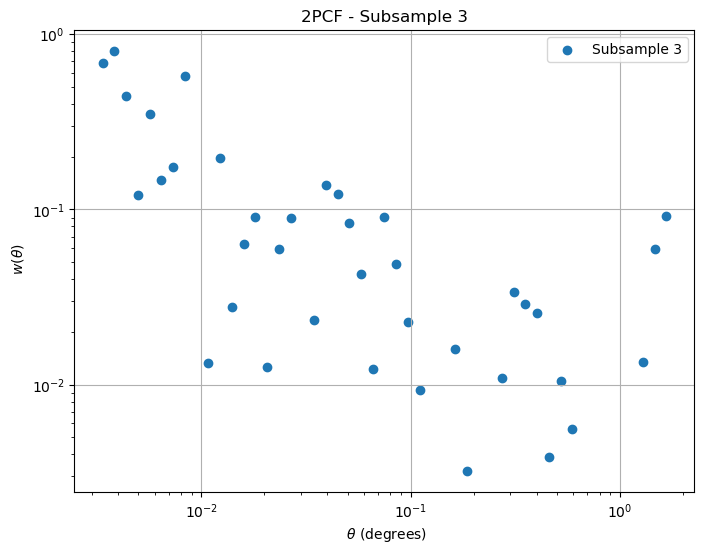

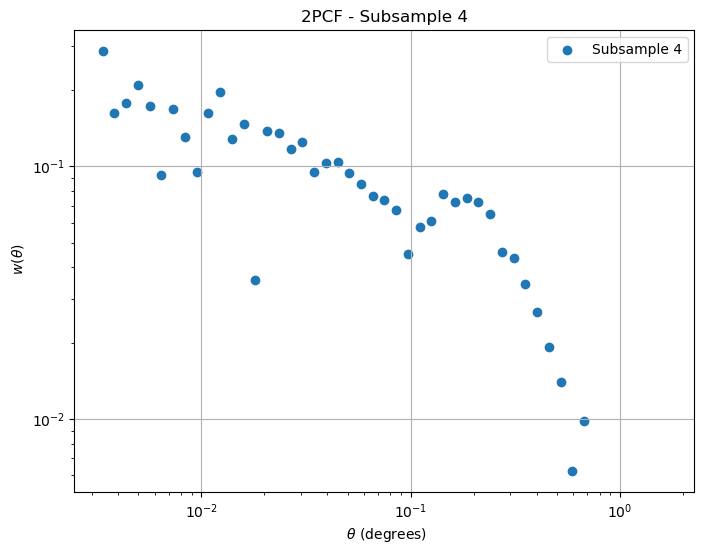

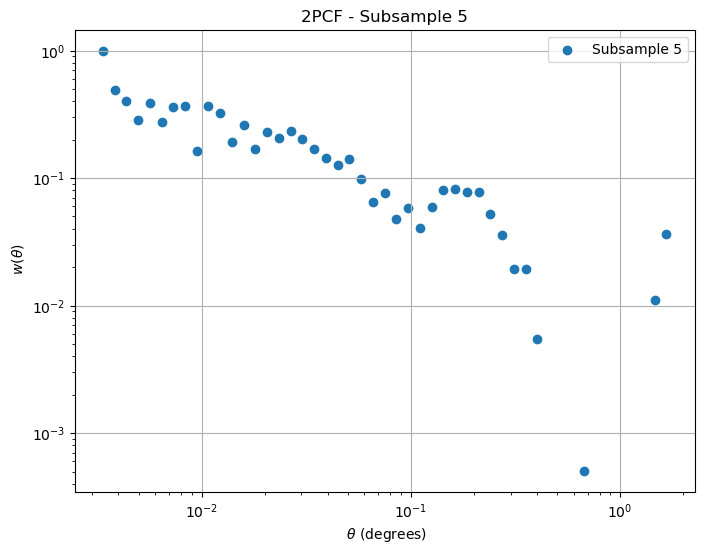

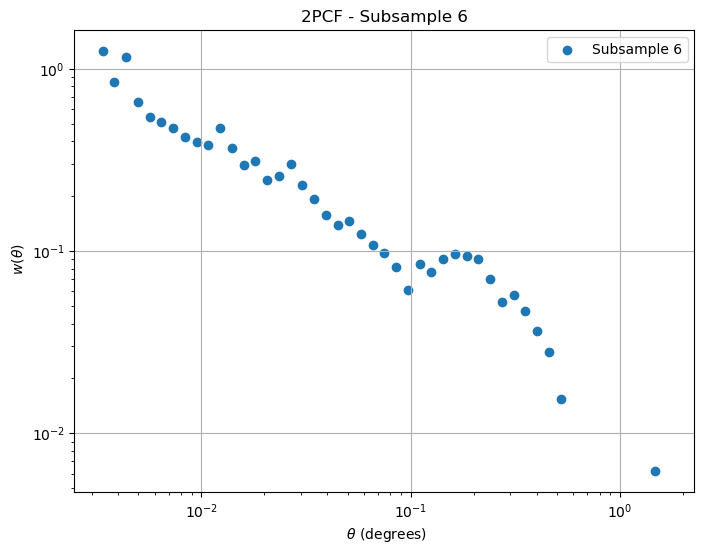

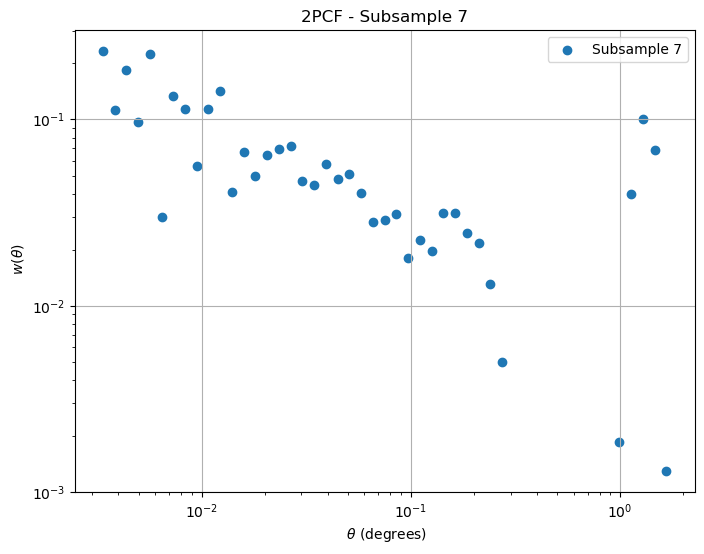

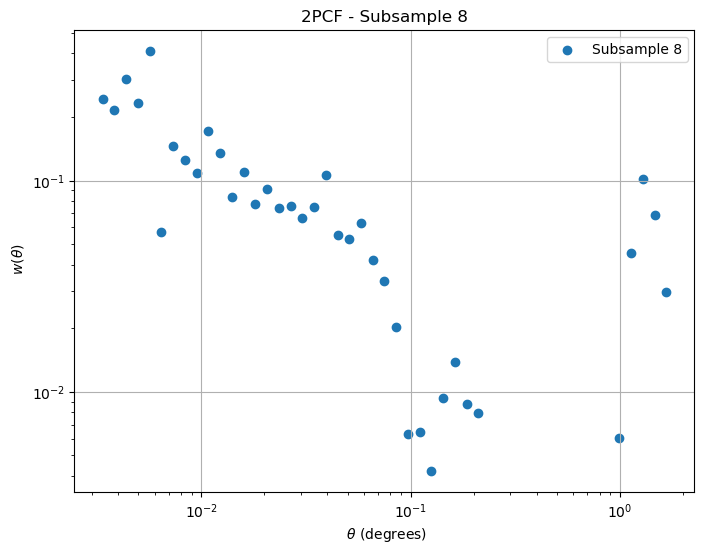

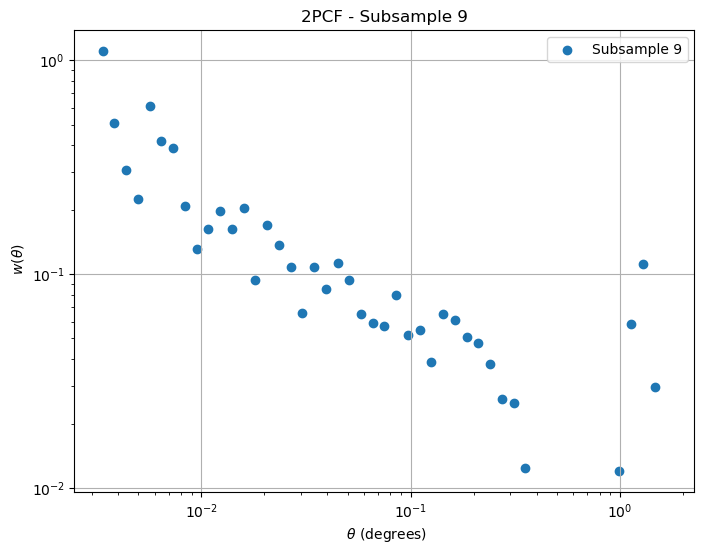

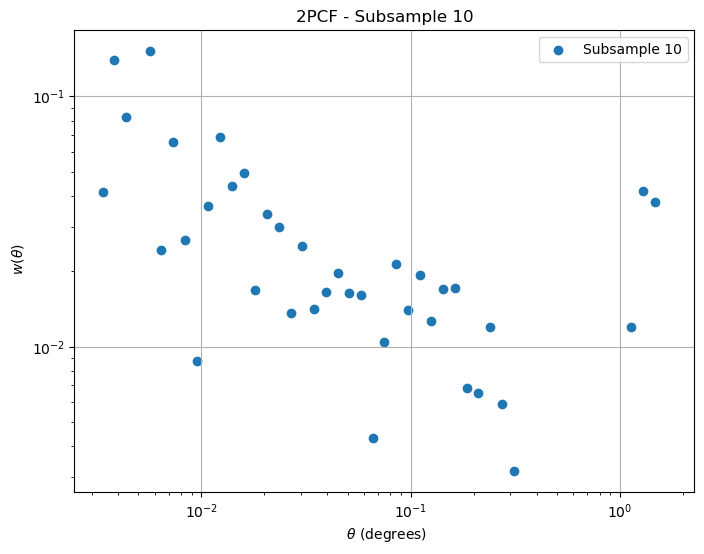

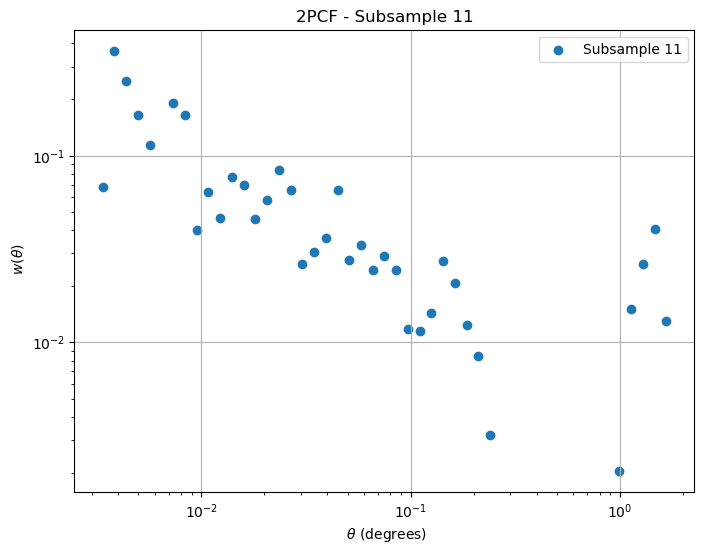

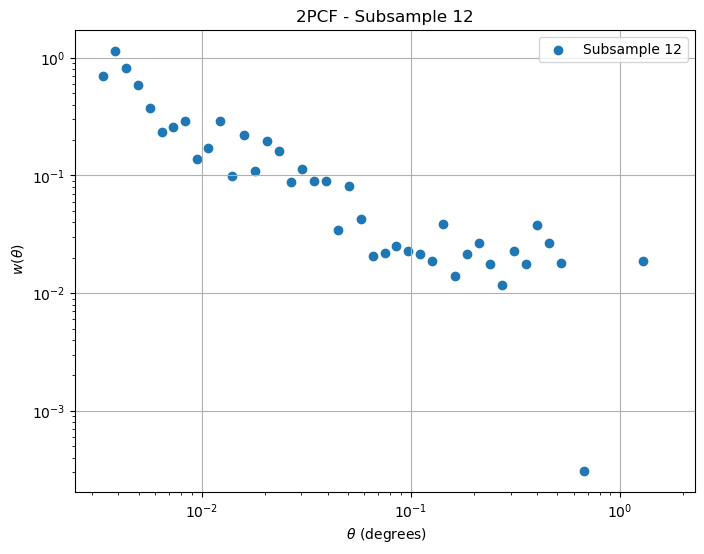

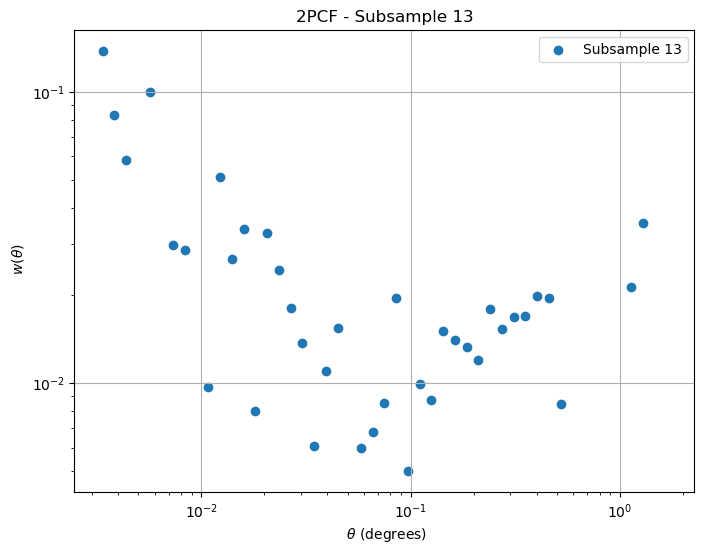

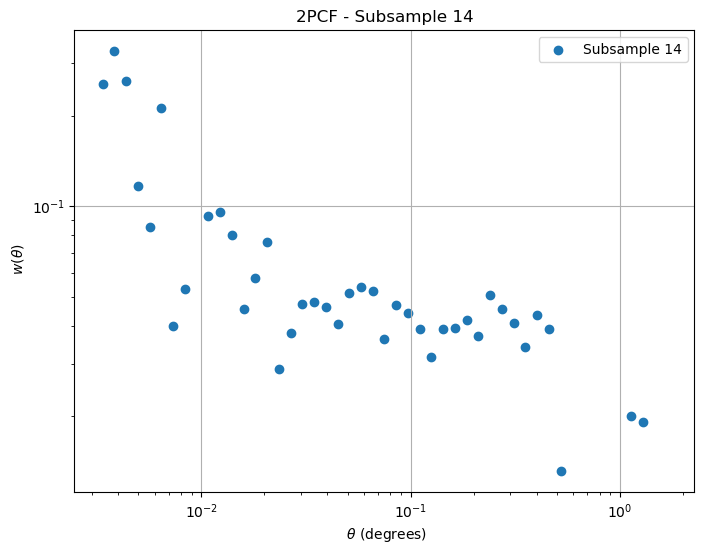

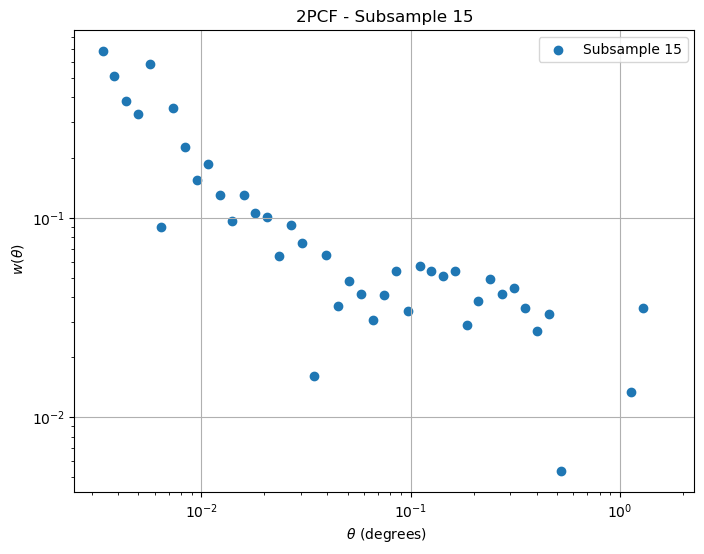

In [10]:
deg_theta_cen=10**theta_cen


# Plot 2PCF for each catalog
for i, two_pcf in enumerate(two_pcf_results):
    plt.figure(figsize=(8, 6))  
    plt.scatter(deg_theta_cen, two_pcf, label=f"Subsample {i+1}")
    plt.yscale('log')
    plt.xscale('log')

    # Set labels and title
    plt.xlabel(r' $ \theta$ (degrees)')
    plt.ylabel(r' $w(\theta)$')
    plt.title(f"2PCF - Subsample {i+1}")

    plt.grid(True)
    plt.legend()



In [11]:

def power_law(x, r0, gamma):
    """Defines the Peebles & Groth (1975) power law function."""
    return (x * r0) ** gamma

-- Subsample 1 Power-law Fit Parameters --
  amplitude_at_1deg: 0.007064596512066319
  gamma: -0.6108872143089714


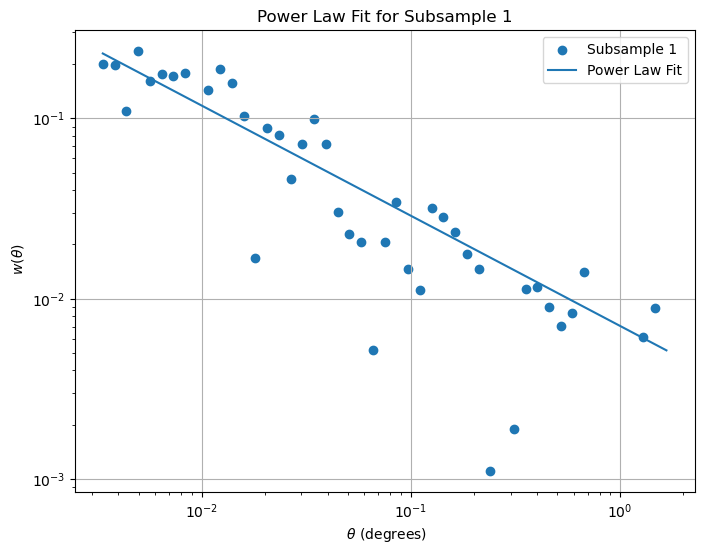

-- Subsample 2 Power-law Fit Parameters --
  amplitude_at_1deg: 0.012473990336256183
  gamma: -0.5565924853109933


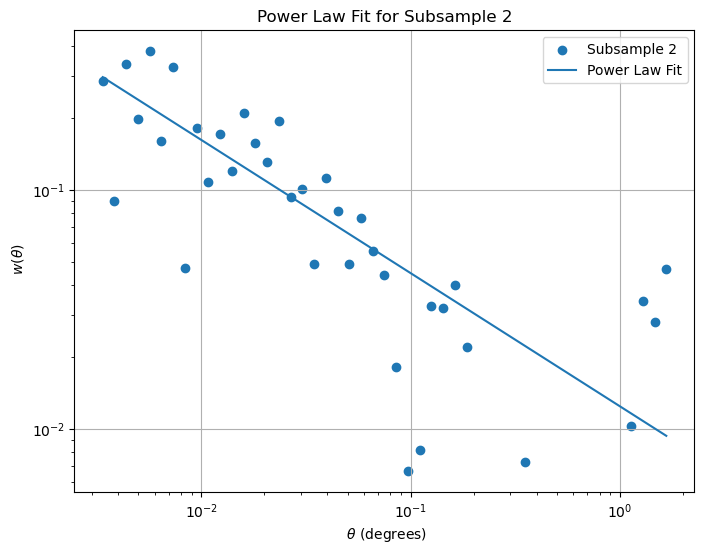

-- Subsample 3 Power-law Fit Parameters --
  amplitude_at_1deg: 1.4241878308902253e-05
  gamma: -1.9266978647729445


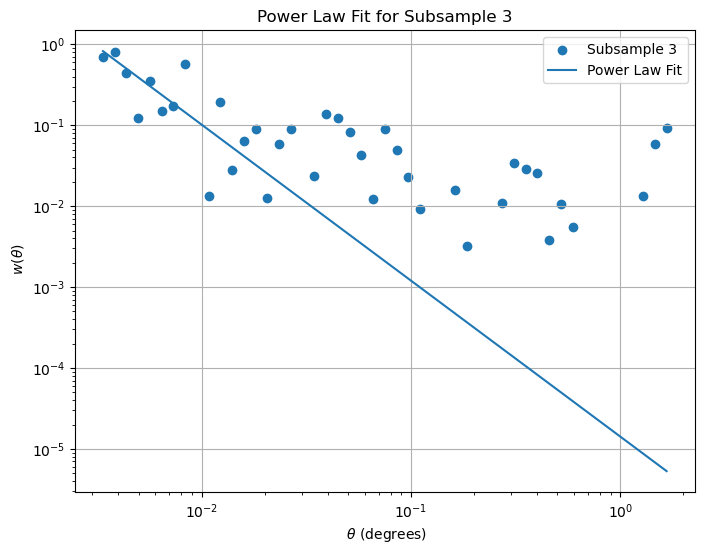

-- Subsample 4 Power-law Fit Parameters --
  amplitude_at_1deg: 0.025185742751687588
  gamma: -0.3712473785586428


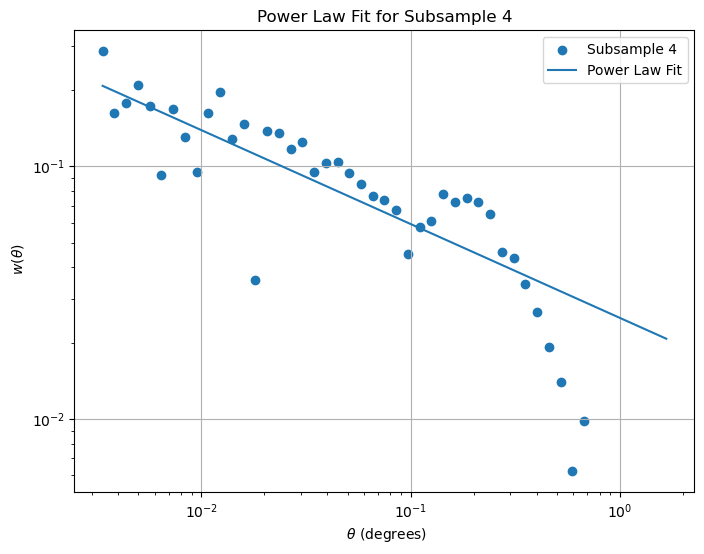

-- Subsample 5 Power-law Fit Parameters --
  amplitude_at_1deg: 0.02370848206920496
  gamma: -0.5313660840481637


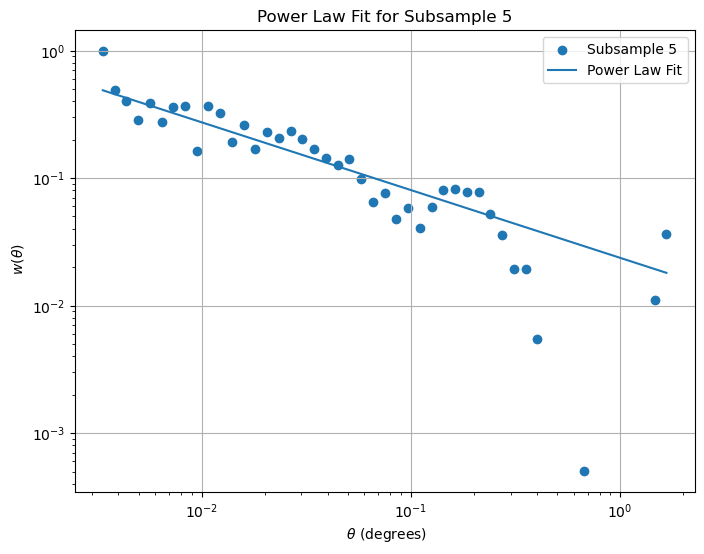

-- Subsample 6 Power-law Fit Parameters --
  amplitude_at_1deg: 0.014485917812014052
  gamma: -0.740921349222975


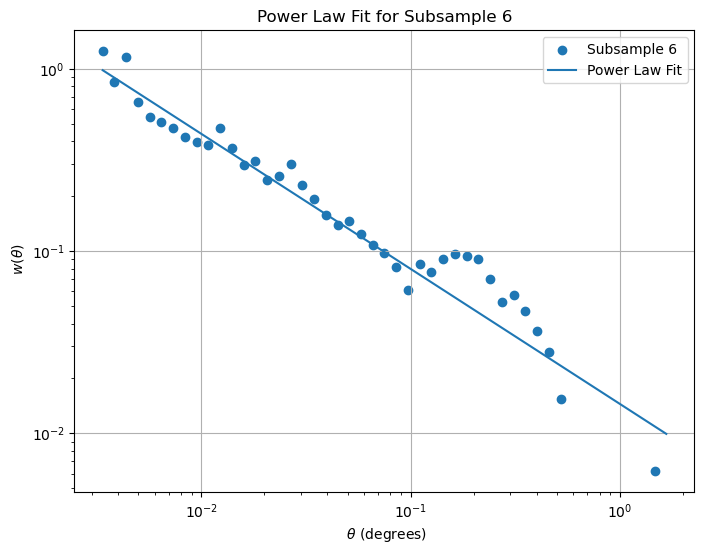

-- Subsample 7 Power-law Fit Parameters --
  amplitude_at_1deg: 0.006122287170100699
  gamma: -0.5868170717146515


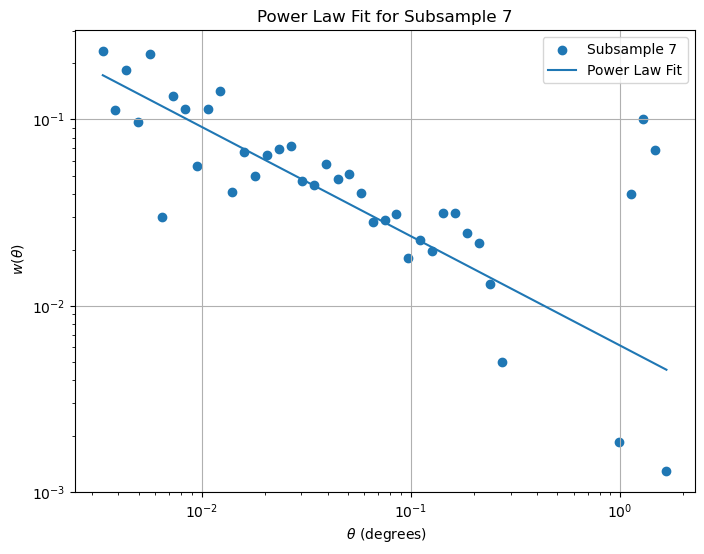

-- Subsample 8 Power-law Fit Parameters --
  amplitude_at_1deg: 0.004199852072195561
  gamma: -0.7589632431588231


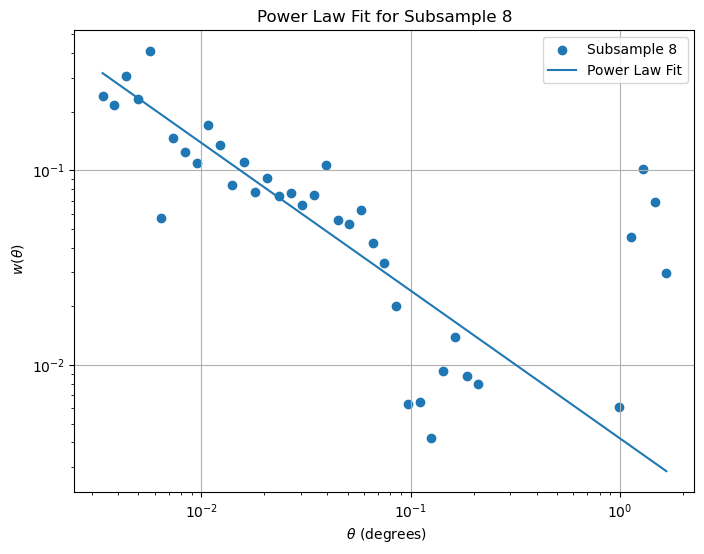

-- Subsample 9 Power-law Fit Parameters --
  amplitude_at_1deg: 0.008195976683708929
  gamma: -0.7271485580684189


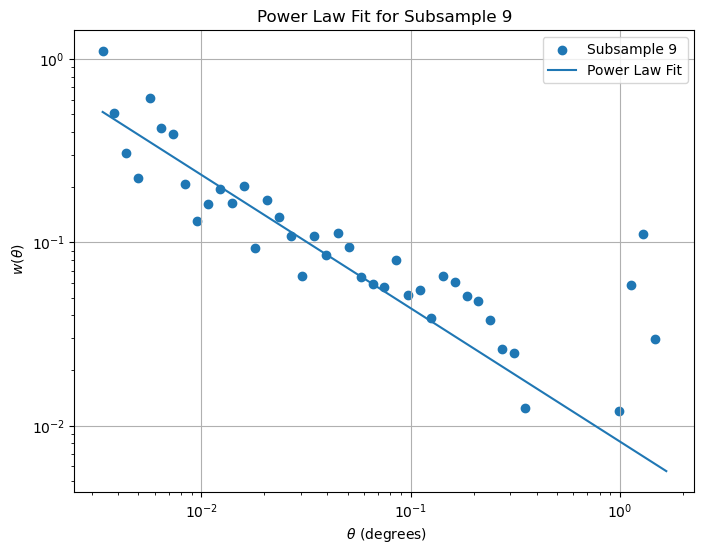

-- Subsample 10 Power-law Fit Parameters --
  amplitude_at_1deg: 0.001358044653016386
  gamma: -0.7628723275362822


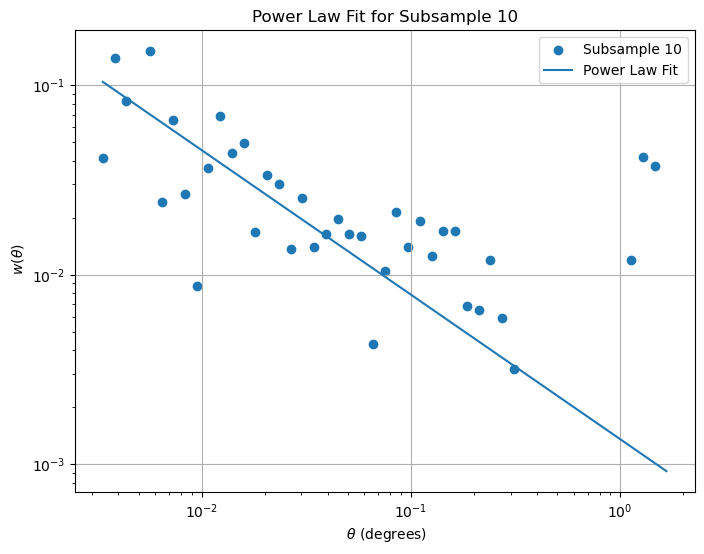

-- Subsample 11 Power-law Fit Parameters --
  amplitude_at_1deg: 0.0003260976244896317
  gamma: -1.2116155184375794


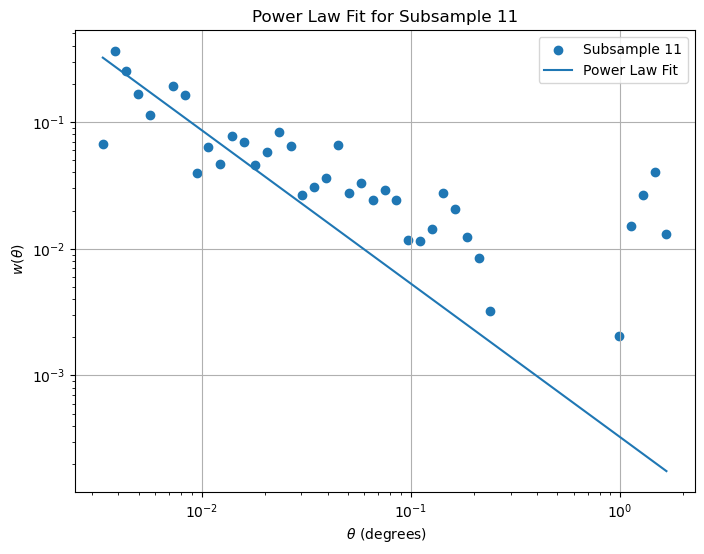

-- Subsample 12 Power-law Fit Parameters --
  amplitude_at_1deg: 4.918428289159326e-05
  gamma: -1.7861065122225235


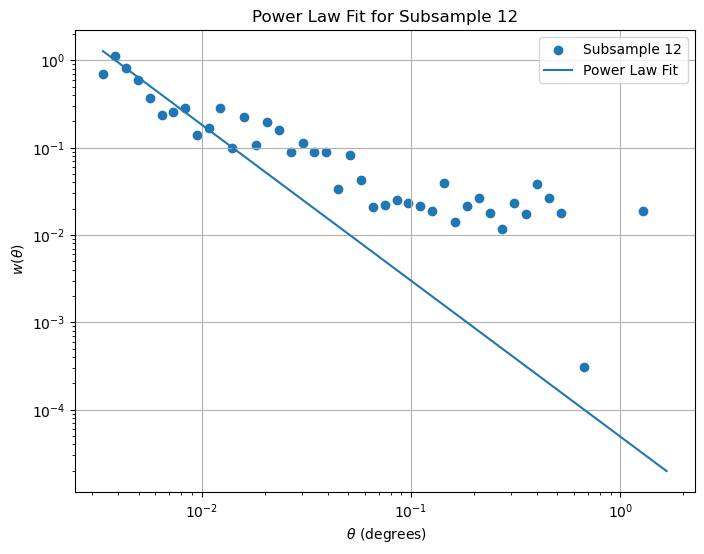

-- Subsample 13 Power-law Fit Parameters --
  amplitude_at_1deg: 0.0019392761184915757
  gamma: -0.5637160487854888


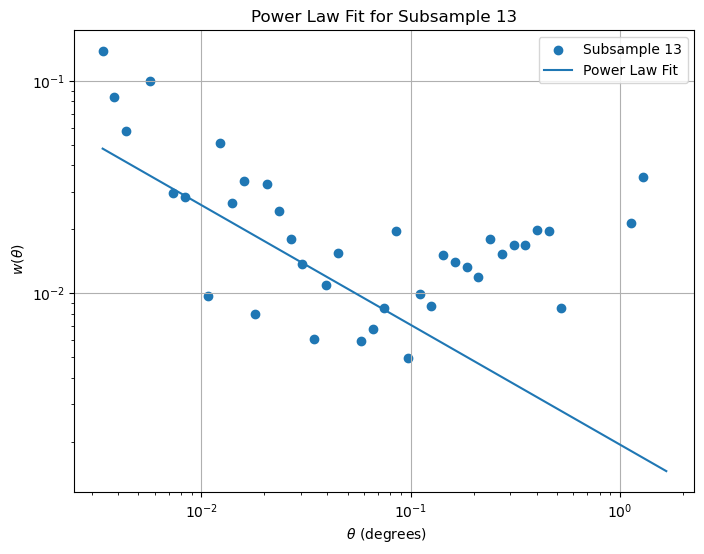

-- Subsample 14 Power-law Fit Parameters --
  amplitude_at_1deg: 0.0008344275352830441
  gamma: -1.0161251377699405


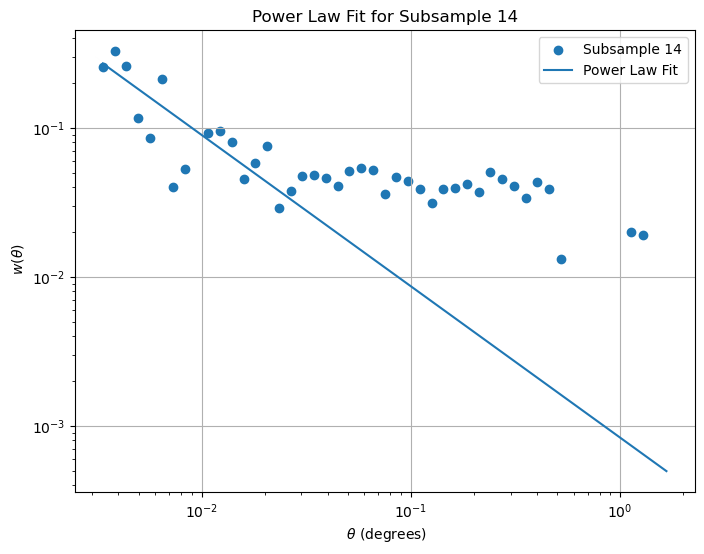

-- Subsample 15 Power-law Fit Parameters --
  amplitude_at_1deg: 0.0023155139395006066
  gamma: -0.9624474491102288


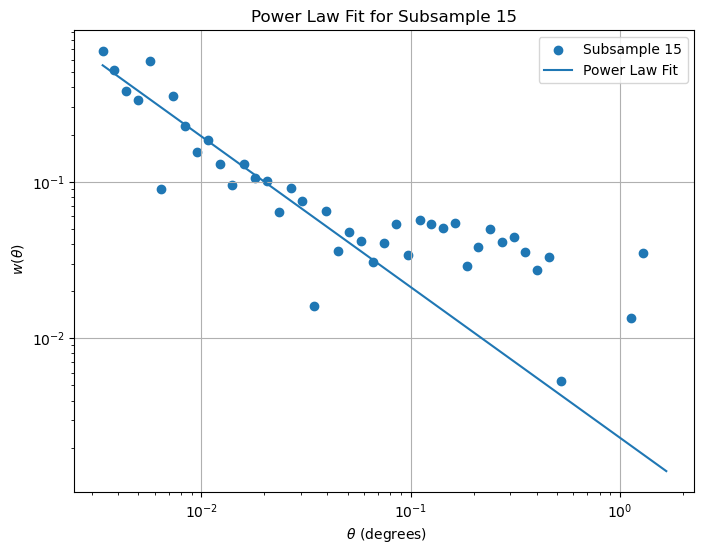

In [12]:




def fit_and_plot_power_law(deg_theta_cen, two_pcf_result, catalog_id):
    """
    Fits a power law to the provided 2PCF data and plots the results.

    Args:
        deg_theta_cen (np.ndarray): Angular separation bins in degrees (log-scaled).
        two_pcf_result (np.ndarray): 2PCF values for the current catalog.
        catalog_id (int): Identifier for the current catalog (used for labeling).
    """

    # Fit the power law using curve_fit with initial guesses
    popt, pcov = curve_fit(power_law, deg_theta_cen[1:], two_pcf_result[1:], p0=[2e-2, -0.8])

    # Extract fitted parameters
    r0_fit = popt[0]
    gamma_fit = popt[1]

    # Calculate amplitude at 1 degree
    amplitude_at_1deg = power_law(1, r0_fit, gamma_fit)
    
    

    # Print fit parameters
    print(f"-- Subsample {catalog_id} Power-law Fit Parameters --")
    print(f"  amplitude_at_1deg:", amplitude_at_1deg)
    print(f"  gamma:", gamma_fit)

    # Create the plot with appropriate axis scales and labels
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.scatter(deg_theta_cen, two_pcf_result, label=f"Subsample {catalog_id}")
    plt.plot(deg_theta_cen, power_law(deg_theta_cen, *popt), label='Power Law Fit')
    plt.xlabel(r' $ \theta$ (degrees)')
    plt.ylabel(r' $w(\theta)$')
    plt.title(f"Power Law Fit for Subsample {catalog_id}")
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)
    plt.legend()
    plt.show()

    return amplitude_at_1deg


for i, (catalog, two_pcf) in enumerate(zip(catalogs, two_pcf_results)):
    deg_theta_cen=10**theta_cen
    fit_and_plot_power_law(deg_theta_cen, two_pcf, i + 1)


plt.close('all')

In [13]:
deg_theta_cen=10**theta_cen
#A=2*1e-2  #amplitude, best is 2*1e-2 aka 0.02
#w_fit= A*deg_theta_cen**(-0.8) #w(theta)

In [14]:


# Calculate 2PCF for each catalog, including integral constraint correction
two_pcf_results = []
errorbars= []

for catalog in catalogs:
    dd_counts = count_pairs_in_theta_bin(catalog, theta_edges)
    rr_counts = count_pairs_in_theta_bin(random_catalog, theta_edges)

    norma_dd = dd_counts / np.sum(dd_counts)
    norma_rr = rr_counts / np.sum(rr_counts)

    two_pcf = (norma_dd / norma_rr) - 1

    # Calculate integral constraint correction
    #w_IC = np.sum(w_fit * rr_counts / np.sum(rr_counts)) ### is it correct to use w_fit every time here?

    # Corrected 2PCF

    w= two_pcf #+ np.sum(w_IC) # w_measured + w_IC  #### commented out the IC correction so it doesn't poluute your later work
        
    fractional_error = 1 / np.sqrt(dd_counts)
    error = fractional_error * (norma_dd / norma_rr)  #So the errorbar on the ratio DD/RR is: ( 1 / sqrt(number of  DD pairs) ) * DD/RR

    errorbars.append(error)


    two_pcf_results.append(w)



/tmp/ipykernel_1181686/3125284895.py:13: RuntimeWarning: divide by zero encountered in log10
  theta_hist,_= np.histogram(np.log10(separation.value),bins=theta_edges)


In [15]:
import pickle



# Save the results to a pickle file
with open('two_pcf_results.pkl', 'wb') as f:
    pickle.dump(two_pcf_results, f)

with open('errorbars.pkl', 'wb') as f:
    pickle.dump(errorbars, f)
    


In [16]:
# Load the results from the pickle file
with open('two_pcf_results.pkl', 'rb') as f:
    loaded_two_pcf_results = pickle.load(f)

with open('errorbars.pkl', 'rb') as f:
    loaded_errorbars = pickle.load(f)

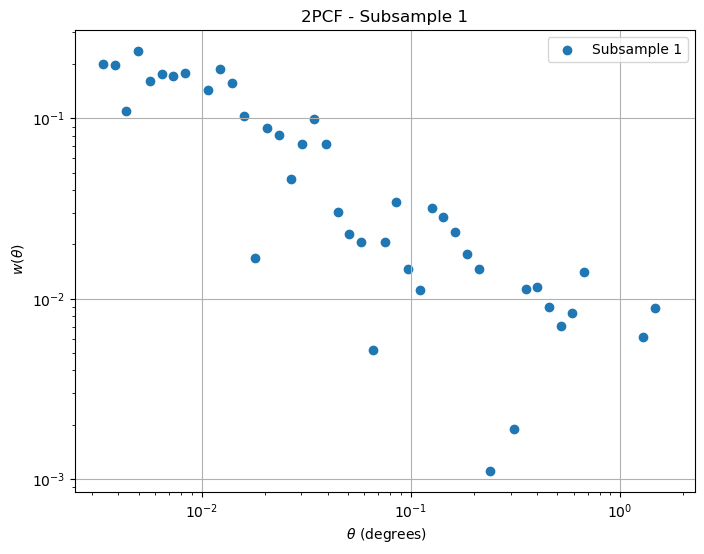

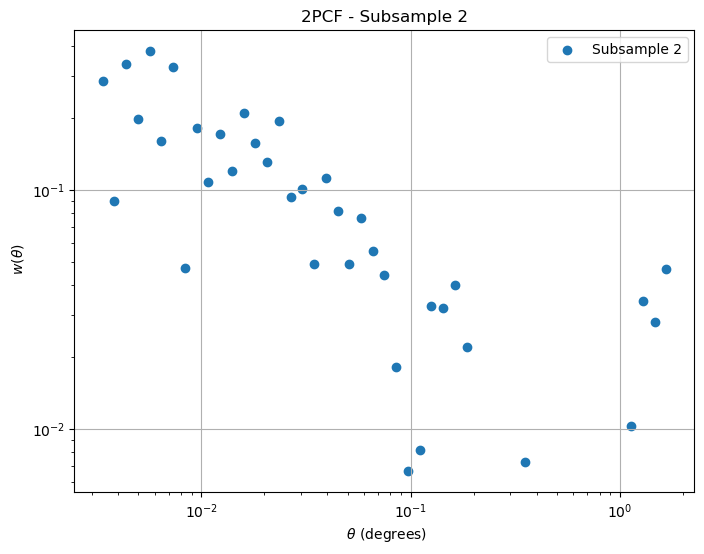

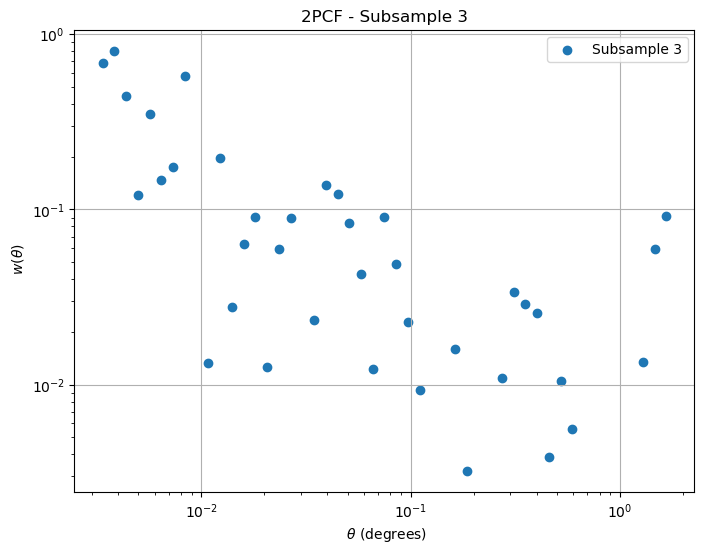

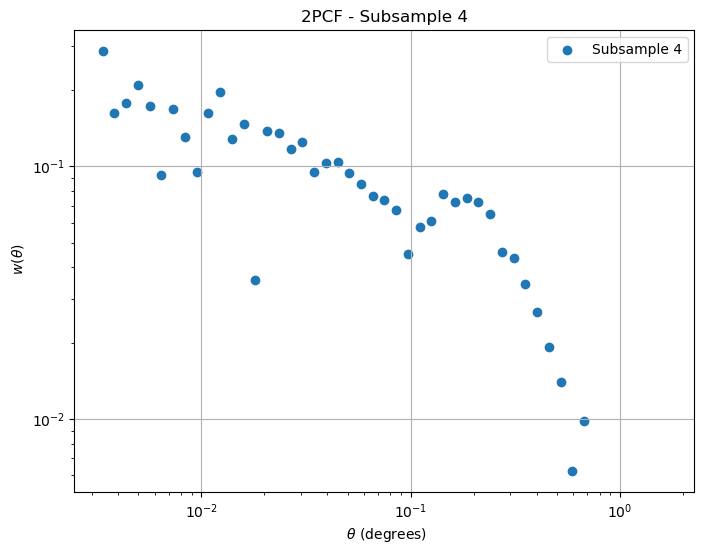

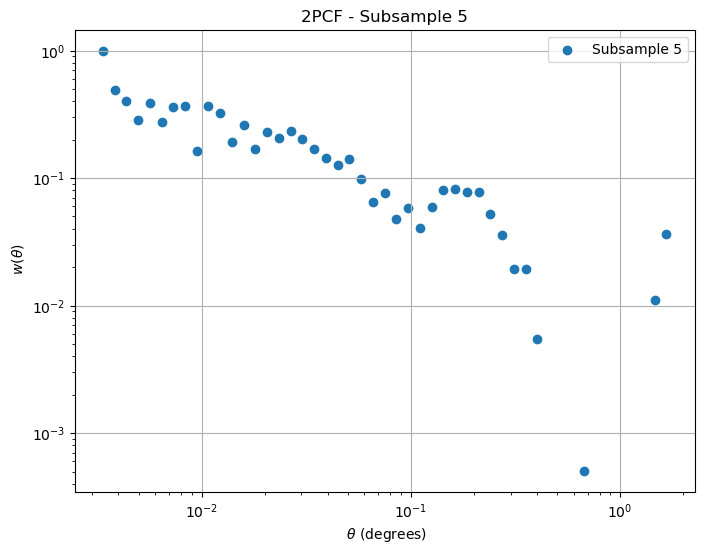

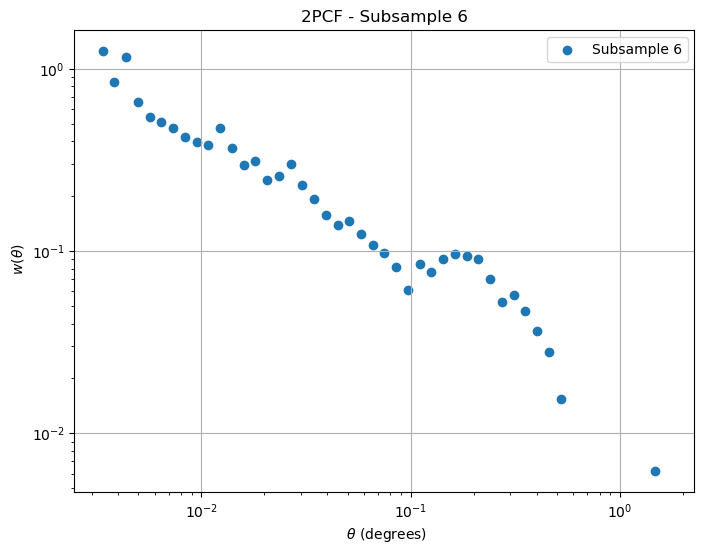

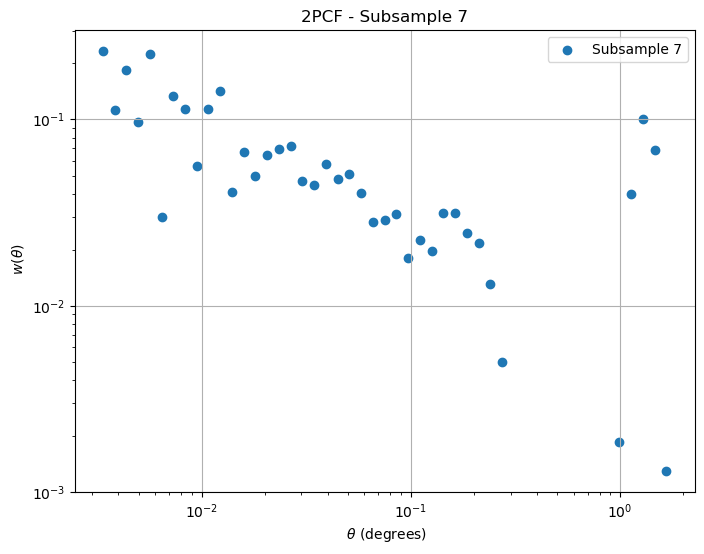

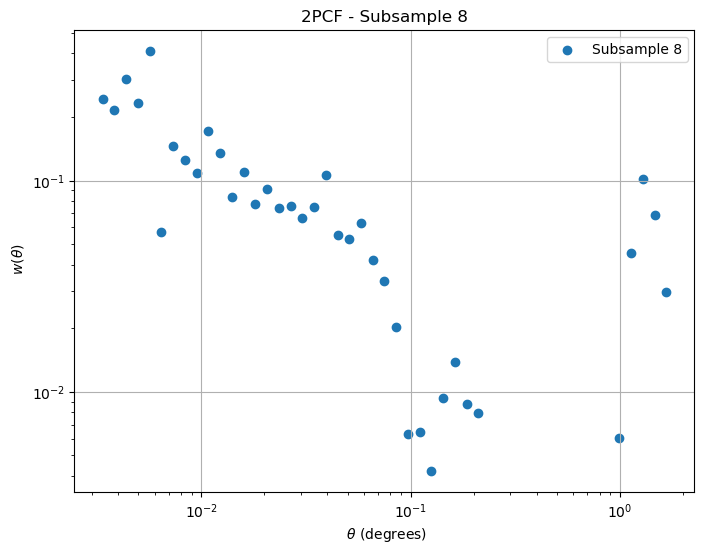

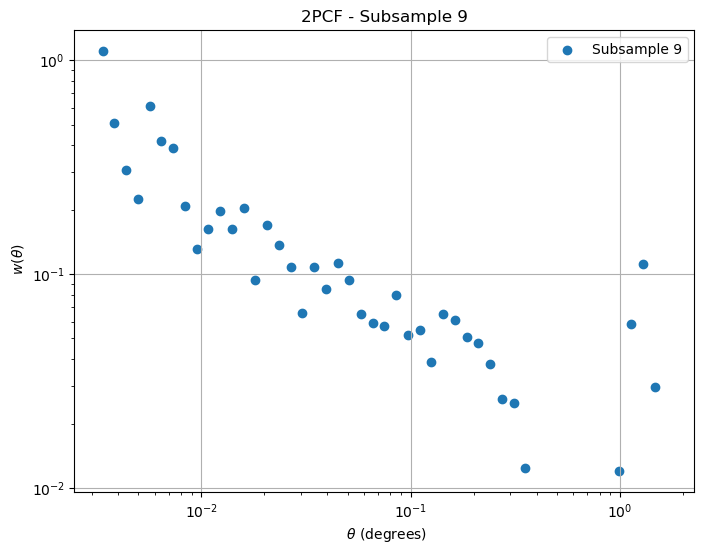

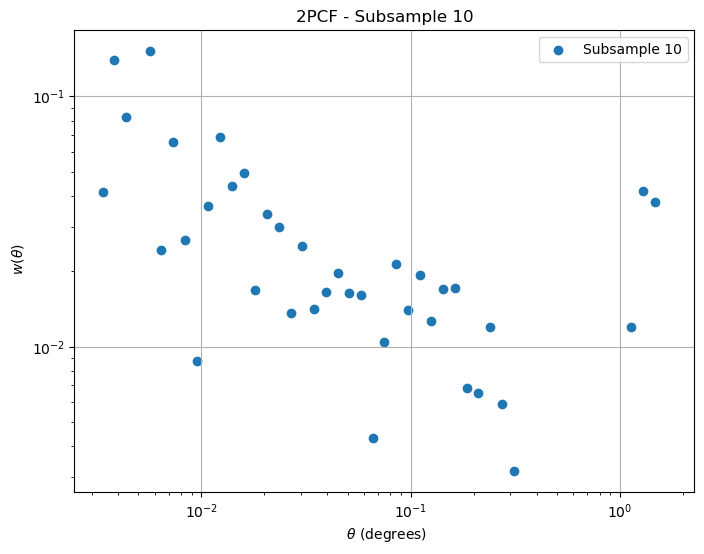

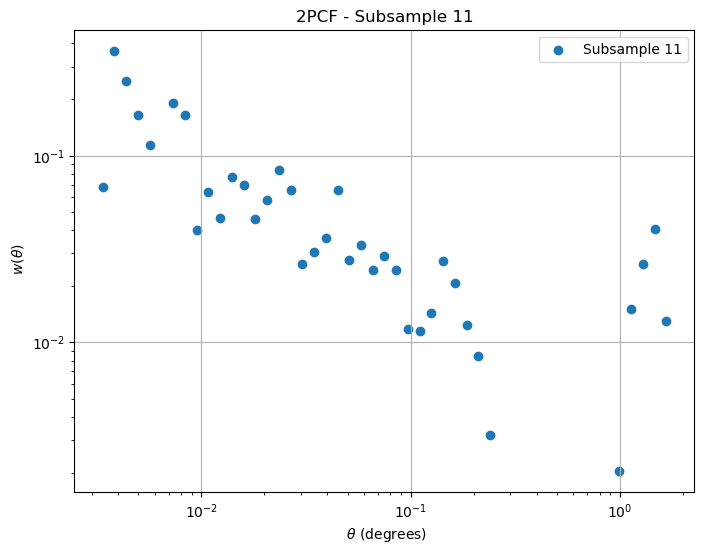

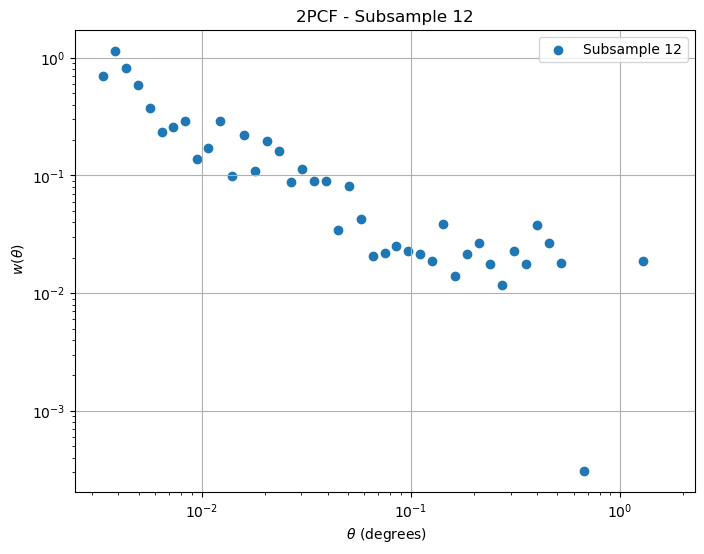

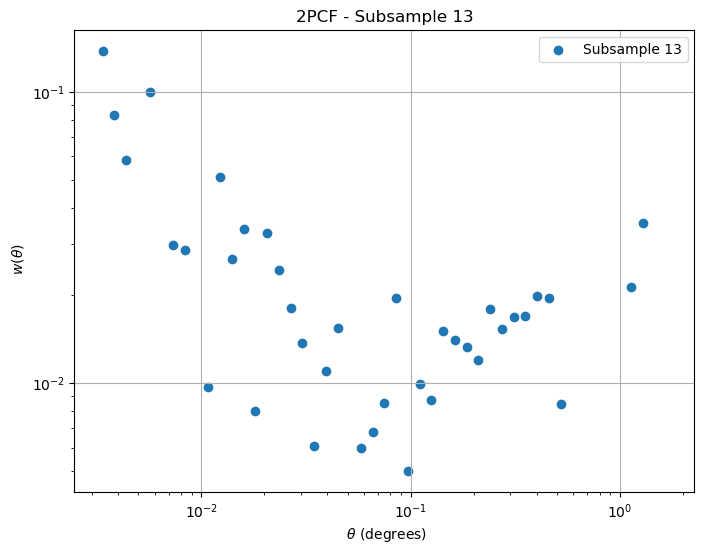

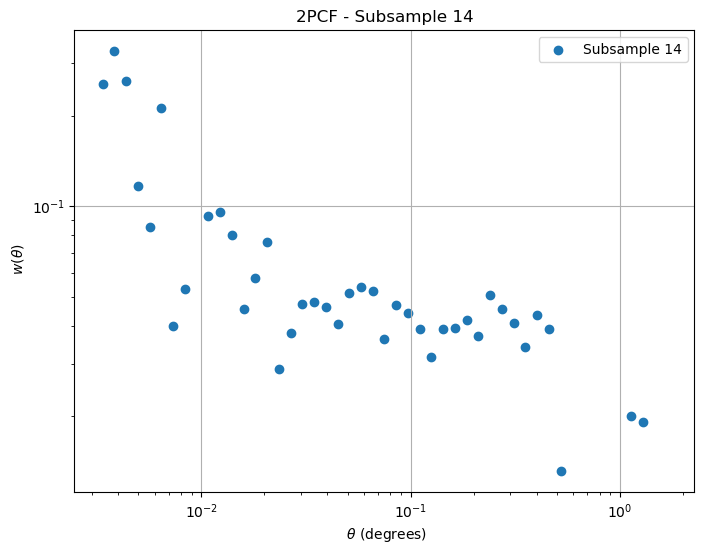

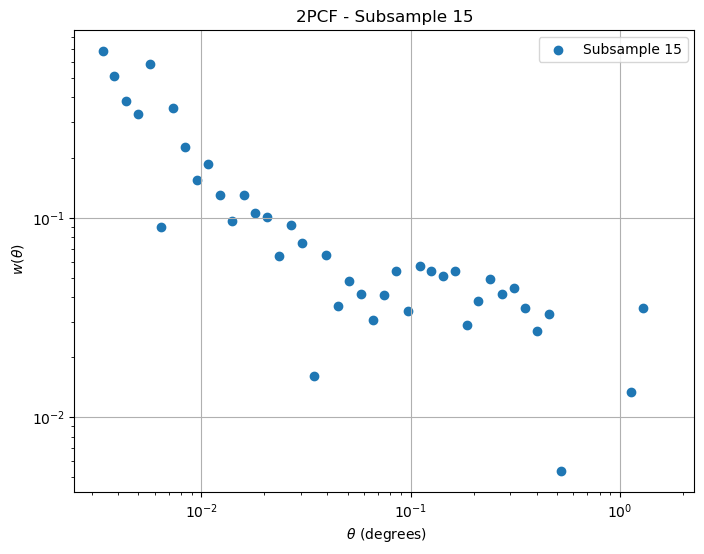

In [17]:
# Plot 2PCF for each catalog
for i, w in enumerate(two_pcf_results):
    plt.figure(figsize=(8, 6))
    plt.scatter(deg_theta_cen, w, label=f"Subsample {i+1}")
    plt.yscale('log')
    plt.xscale('log')
    #plt.plot(deg_theta_cen, power_law(deg_theta_cen, *popt), label='Power Law Fit')
    
    #plt.plot(deg_theta_cen, w_fit, label='Power Law Fit') ### the fit is clearly wrong for most plots. But maybe it's not used.
 
    plt.xlabel(r' $ \theta$ (degrees)')
    plt.ylabel(r' $w(\theta)$')
    plt.title(f"2PCF - Subsample {i+1}")

    plt.grid(True)
    plt.legend()
    plt.show()


-- Subsample 1 Power-law Fit Parameters --
  amplitude_at_1deg: 0.007064596512066319
  gamma: -0.6108872143089714


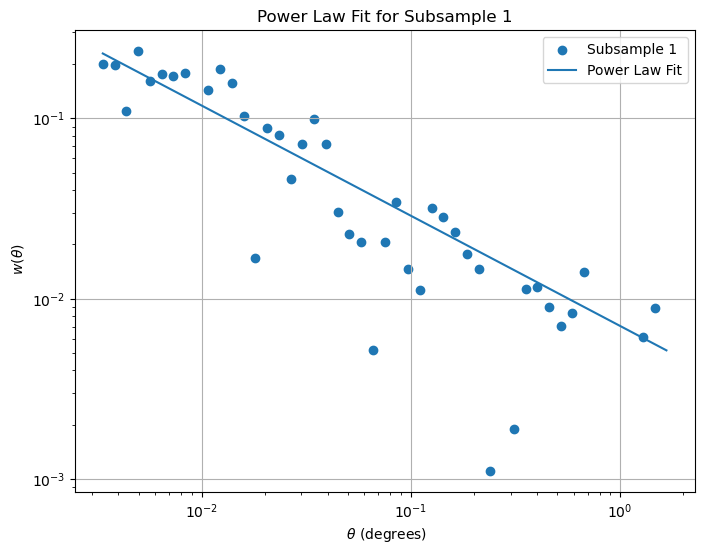

-- Subsample 2 Power-law Fit Parameters --
  amplitude_at_1deg: 0.012473990336256183
  gamma: -0.5565924853109933


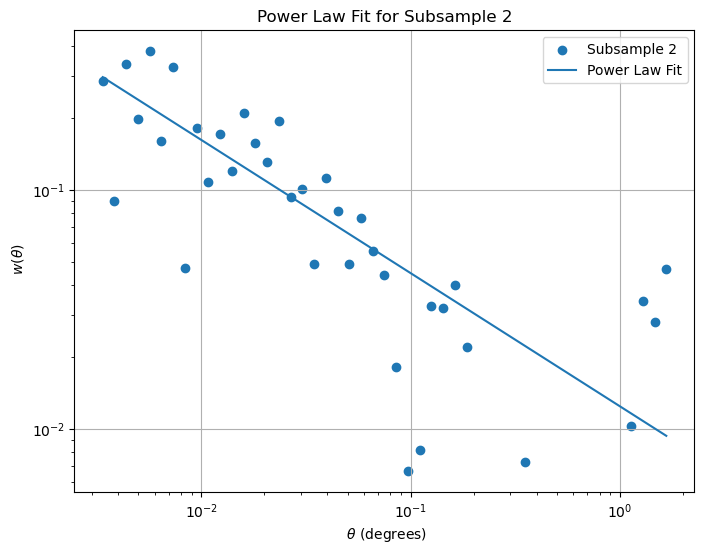

-- Subsample 3 Power-law Fit Parameters --
  amplitude_at_1deg: 1.4241878308902253e-05
  gamma: -1.9266978647729445


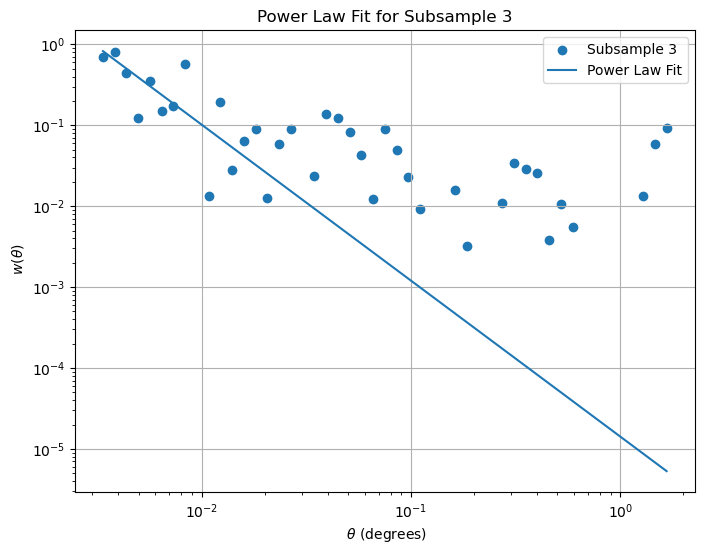

-- Subsample 4 Power-law Fit Parameters --
  amplitude_at_1deg: 0.025185742751687588
  gamma: -0.3712473785586428


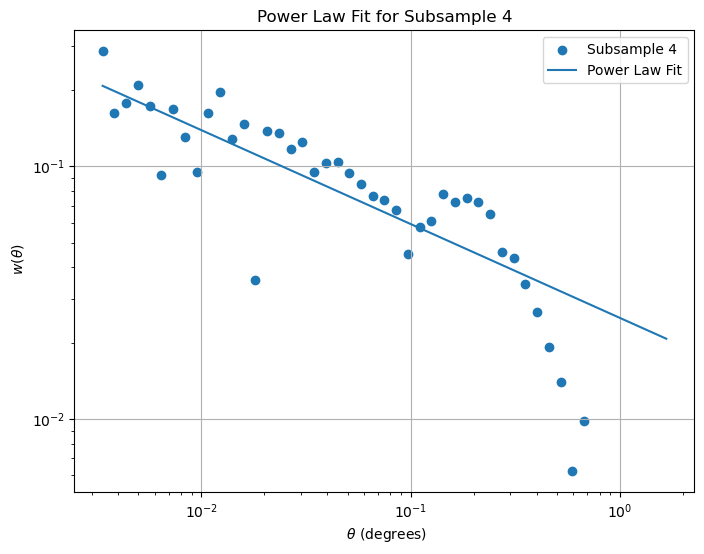

-- Subsample 5 Power-law Fit Parameters --
  amplitude_at_1deg: 0.02370848206920496
  gamma: -0.5313660840481637


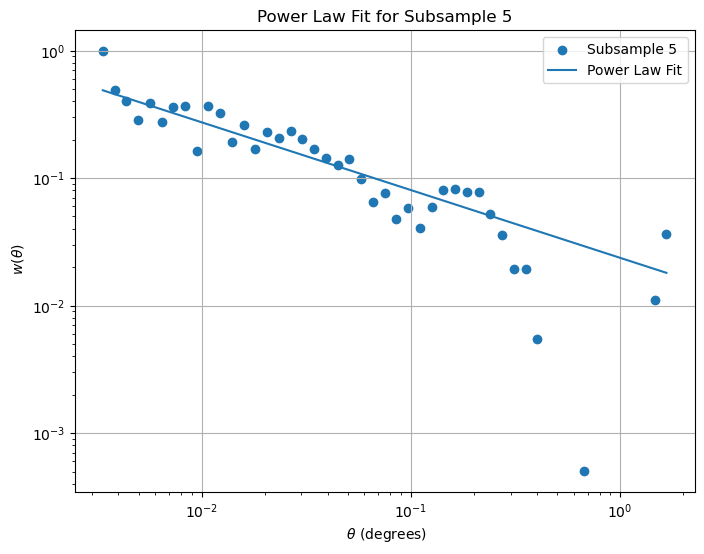

-- Subsample 6 Power-law Fit Parameters --
  amplitude_at_1deg: 0.014485917812014052
  gamma: -0.740921349222975


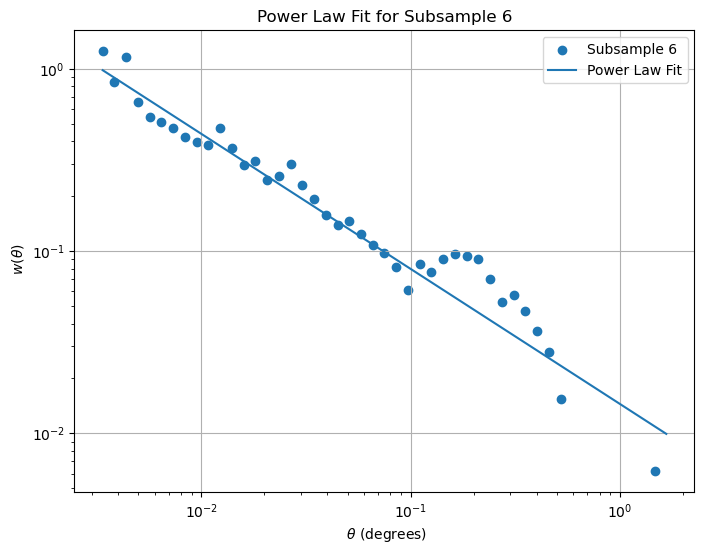

-- Subsample 7 Power-law Fit Parameters --
  amplitude_at_1deg: 0.006122287170100699
  gamma: -0.5868170717146515


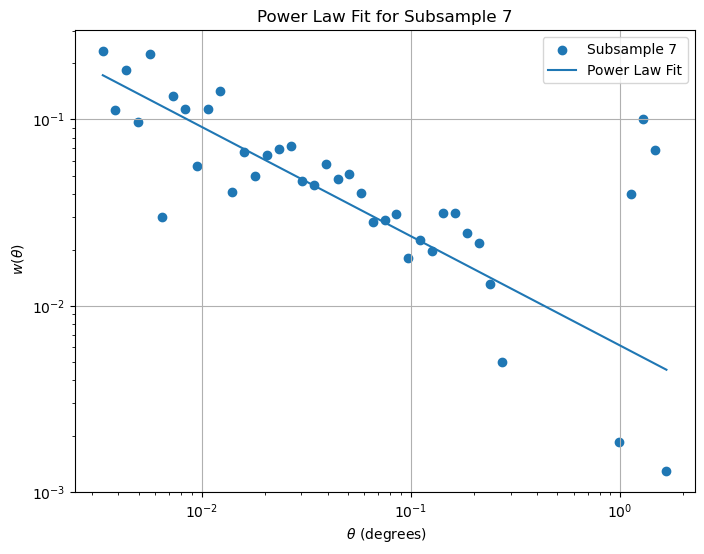

-- Subsample 8 Power-law Fit Parameters --
  amplitude_at_1deg: 0.004199852072195561
  gamma: -0.7589632431588231


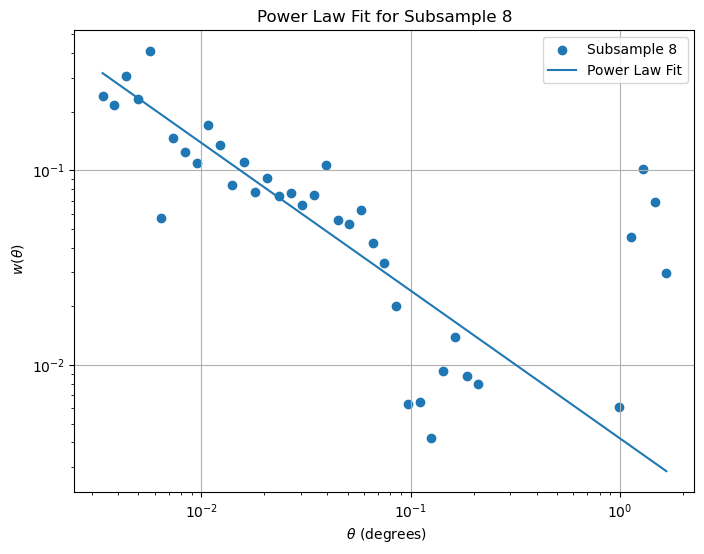

-- Subsample 9 Power-law Fit Parameters --
  amplitude_at_1deg: 0.008195976683708929
  gamma: -0.7271485580684189


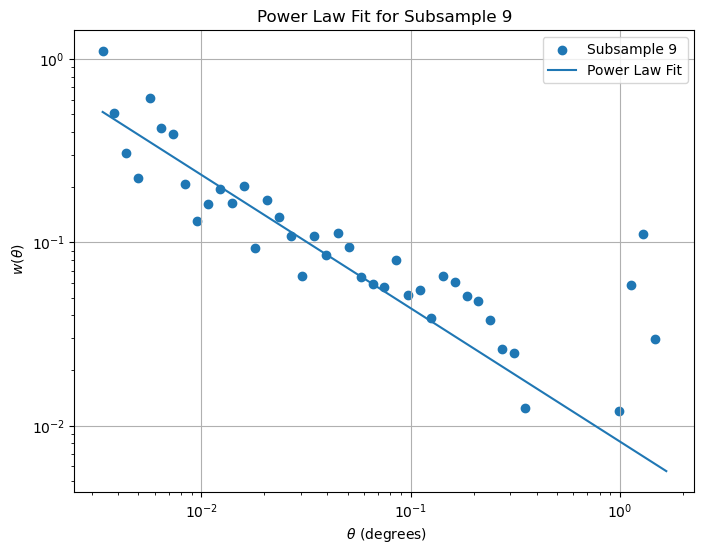

-- Subsample 10 Power-law Fit Parameters --
  amplitude_at_1deg: 0.001358044653016386
  gamma: -0.7628723275362822


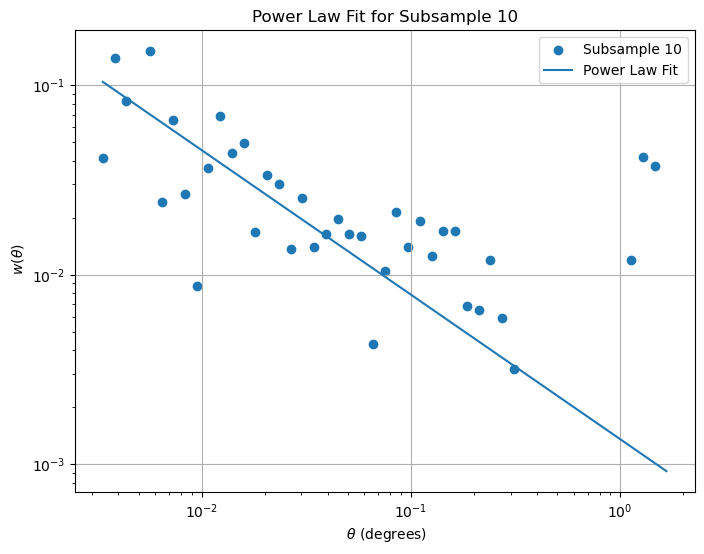

-- Subsample 11 Power-law Fit Parameters --
  amplitude_at_1deg: 0.0003260976244896317
  gamma: -1.2116155184375794


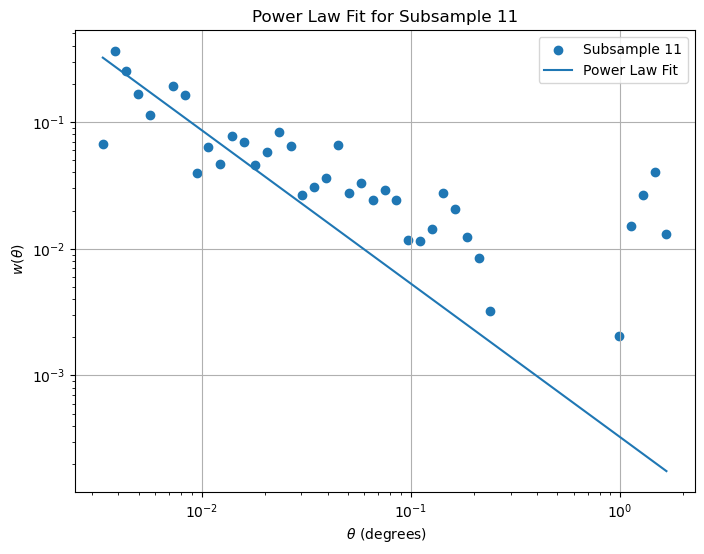

-- Subsample 12 Power-law Fit Parameters --
  amplitude_at_1deg: 4.918428289159326e-05
  gamma: -1.7861065122225235


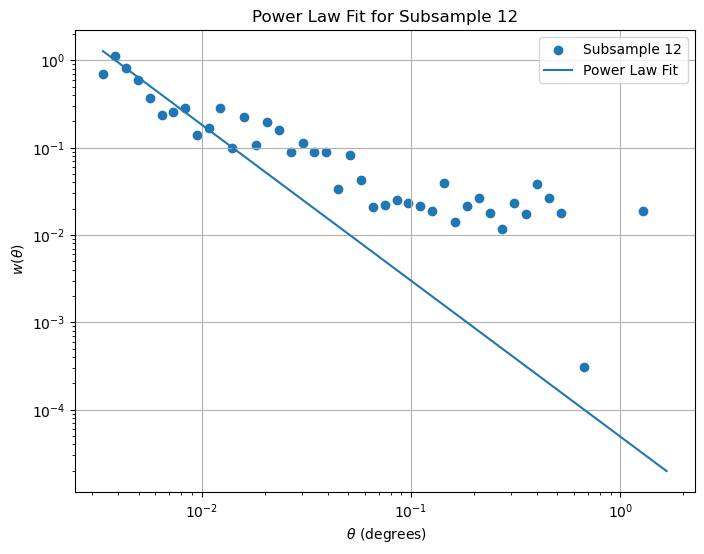

-- Subsample 13 Power-law Fit Parameters --
  amplitude_at_1deg: 0.0019392761184915757
  gamma: -0.5637160487854888


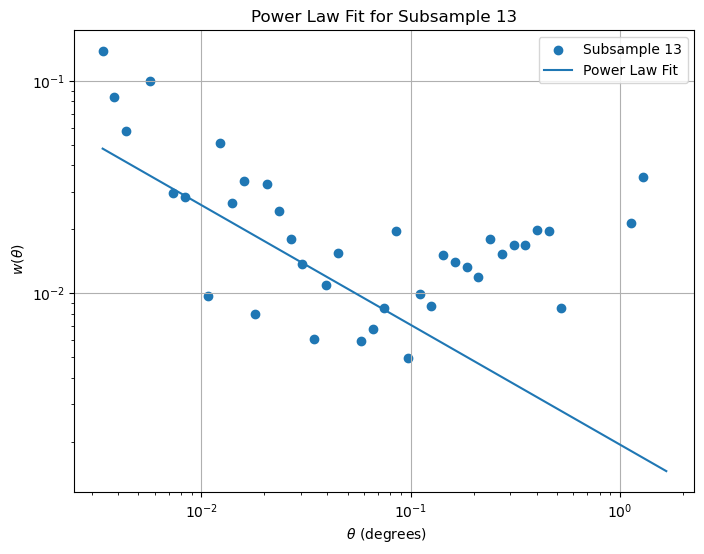

-- Subsample 14 Power-law Fit Parameters --
  amplitude_at_1deg: 0.0008344275352830441
  gamma: -1.0161251377699405


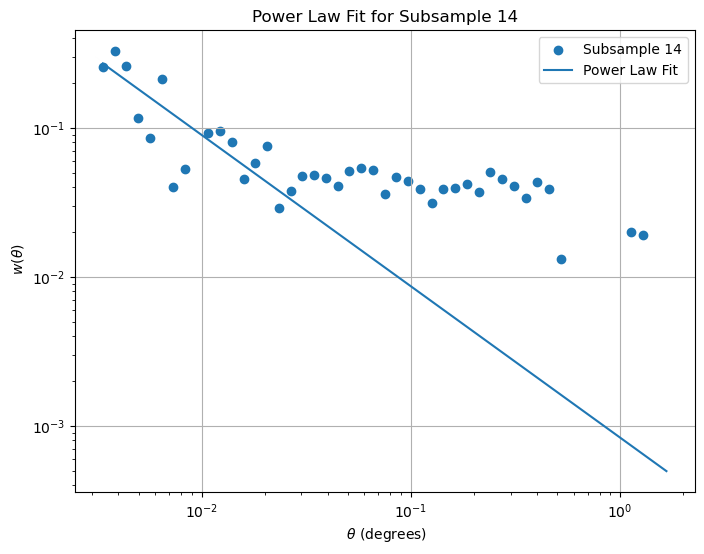

-- Subsample 15 Power-law Fit Parameters --
  amplitude_at_1deg: 0.0023155139395006066
  gamma: -0.9624474491102288


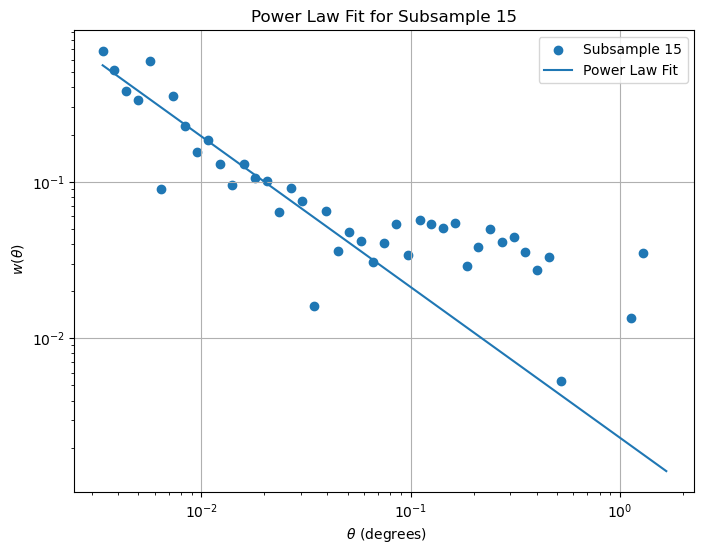

Amplitudes for each subsample: [0.007064596512066319, 0.012473990336256183, 1.4241878308902253e-05, 0.025185742751687588, 0.02370848206920496, 0.014485917812014052, 0.006122287170100699, 0.004199852072195561, 0.008195976683708929, 0.001358044653016386, 0.0003260976244896317, 4.918428289159326e-05, 0.0019392761184915757, 0.0008344275352830441, 0.0023155139395006066]


In [18]:
def fit_and_plot_power_law(deg_theta_cen, two_pcf_result, catalog_id,  max_nfev=2000):
    
    popt, pcov = curve_fit(power_law, deg_theta_cen[1:], two_pcf_result[1:], 
                         p0=[2e-2, -0.8], maxfev=max_nfev)

    # Extract fitted parameters
    r0_fit = popt[0]
    gamma_fit = popt[1]

    # Calculate amplitude at 1 degree
    amplitude_at_1deg = power_law(1, r0_fit, gamma_fit)
    
    

    # Print fit parameters
    print(f"-- Subsample {catalog_id} Power-law Fit Parameters --")
    print(f"  amplitude_at_1deg:", amplitude_at_1deg)
    print(f"  gamma:", gamma_fit)

    # Create the plot with appropriate axis scales and labels
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.scatter(deg_theta_cen, two_pcf_result, label=f"Subsample {catalog_id}")
    plt.plot(deg_theta_cen, power_law(deg_theta_cen, *popt), label='Power Law Fit')
    plt.xlabel(r' $ \theta$ (degrees)')
    plt.ylabel(r' $w(\theta)$')
    plt.title(f"Power Law Fit for Subsample {catalog_id}")
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)
    plt.legend()
    plt.show()

    return amplitude_at_1deg

#### currently ignoring IC
amplitudes = []
for i, w in enumerate(two_pcf_results):
    amplitude = fit_and_plot_power_law(deg_theta_cen, w, i + 1, max_nfev=4000) ### This was using the IC correction from the wrong power law - now removed in earlier line
    amplitudes.append(amplitude)

print("Amplitudes for each subsample:", amplitudes)

In [19]:
amplitudes = []

#for i, (catalog, two_pcf) in enumerate(zip(catalogs, two_pcf_results)):
for i, w in enumerate(two_pcf_results):

    amplitude= power_law(1, 2e-2, -0.8)

    amplitudes.append(amplitude)

print("Amplitudes for each subsample:", amplitudes)
### these amplitudes are not correct, do you recompute later?
# let's get rid of them
amplitudes = []

Amplitudes for each subsample: [22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632, 22.86525259636632]


In [60]:
from astropy.cosmology import Planck15
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',**{'family':'serif','size':18})
#plt.rc('text', usetex=True) # comment out this line if you don't have latex installed


In [21]:
### this doesn't work because of things I've changed earlier
#w_fits= []
#for i, w in enumerate(two_pcf_results):
#    w_fit= amplitudes[i]*deg_theta_cen**(-0.8)
#    w_fits.append(w_fit)


In [22]:
### OK, this looks correct, but we need to check that the two_pcf_results array doesn't have an IC correction already

# Fit the power-law model to each catalog
model_results = []
for i, w in enumerate(two_pcf_results):
    
    # Extract data for fitting
    cuts = (deg_theta_cen > 3e-3) & (deg_theta_cen < 1)
    X = deg_theta_cen[cuts]
    Y = w[cuts]
    fractional_error = 1 / np.sqrt(dd_counts)
    errorbars = fractional_error * (norma_dd / norma_rr)  #So the errorbar on the ratio DD/RR is: ( 1 / sqrt(number of  DD pairs) ) * DD/RR
    
    #w_fit= amps[i]*deg_theta_cen**(-0.8) #w(theta)    
    
    Y_err = errorbars[cuts]  
    mask_rr = rr_counts[cuts]
    

    # Build the PyMC model
    with pm.Model() as model:
        rr = pm.ConstantData("rr", mask_rr, dims="observation")

        # Define priors
        power = pm.Normal("power", mu=-0.8, sigma=1e-8) ### use narrow gaussian to fix the value
        #power = pm.ConstantData("power", -0.8) ### hmmm, couldn't pass that to the chain properly.
        A = pm.Normal("A", mu=2e-2, sigma=10)
        #A = pm.Normal("A", mu=amplitudes[i], sigma=10)

        #Y_pred = A * (X** power)
        
        #!!!!! this is what i changed here!!!!
        Y_pred = A * (X** (-0.8))
        ### we'll use the fuller form, but keep power fixed
        Y_pred = A * (X** power)

        IC = pm.math.sum(Y_pred * rr / pm.math.sum(rr))

        total_sigma = np.sqrt(Y_err**2) ### this doesn't do anything atm, right?

        # Define likelihood
        likelihood = pm.Normal("Y", mu=Y_pred - IC, sigma=total_sigma, observed=Y, dims="observation")

        # Inference
        idata = pm.sample(3000)

        # Extract posterior samples
        power_post = np.array(idata.posterior['power']).flatten()
        A_post = np.array(idata.posterior['A']).flatten()
        

        # Calculate median values
        power_median = np.median(power_post) ### what do you expect this to look like?
        A_median = np.median(A_post)

        model_results.append((power_median, A_median))
        

# Print or analyze the model results for each catalog
for i, (power_median, A_median) in enumerate(model_results):
    print(f"Subsample {i+1}:")
    print(f"Power-law index: {power_median:.3f}")
    print(f"Amplitude: {A_median:.3f}")

#lower_ci = np.quantile(power_post, 0.025)
#upper_ci = np.quantile(power_post, 0.975)
#print(f"95% Confidence Interval: [{lower_ci:.3f}, {upper_ci:.3f}]")



/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 20 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 23 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 21 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 23 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 20 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 20 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 21 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 21 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 22 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 19 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 22 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 22 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 20 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 21 seconds.
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/pymc/data.py:291: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, A]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 22 seconds.


Subsample 1:
Power-law index: -0.800
Amplitude: 0.005
Subsample 2:
Power-law index: -0.800
Amplitude: 0.008
Subsample 3:
Power-law index: -0.800
Amplitude: 0.008
Subsample 4:
Power-law index: -0.800
Amplitude: 0.011
Subsample 5:
Power-law index: -0.800
Amplitude: 0.013
Subsample 6:
Power-law index: -0.800
Amplitude: 0.019
Subsample 7:
Power-law index: -0.800
Amplitude: 0.008
Subsample 8:
Power-law index: -0.800
Amplitude: 0.008
Subsample 9:
Power-law index: -0.800
Amplitude: 0.013
Subsample 10:
Power-law index: -0.800
Amplitude: 0.004
Subsample 11:
Power-law index: -0.800
Amplitude: 0.005
Subsample 12:
Power-law index: -0.800
Amplitude: 0.008
Subsample 13:
Power-law index: -0.800
Amplitude: 0.004
Subsample 14:
Power-law index: -0.800
Amplitude: 0.008
Subsample 15:
Power-law index: -0.800
Amplitude: 0.009


In [23]:
# Functions
def integrand(z_prime):
    return ((1 + z_prime)**3 + Omega0 - 1)**(-0.5)


def x(z, H0, Omega0):
    result, _ = integrate.quad(integrand, 0, z)
    return result * (Omega0**(-0.5) * H0)

def F(z, Omega0):
    return 1

def P(z, Omega0):
    return np.sqrt(Omega0) * np.sqrt((1 + z) ** 3 +  Omega0**(- 1) - 1)

In [25]:


# Constants

#gamma = 1.8
H_gamma = 3.68
c = 299792.458  # km/s
Omega0 = 0.3
Lambda = 1 - Omega0
h0 = 0.70
H0 = h0 * 100  # km/s/Mpc


r0s= []


    
for i, (power_median, A_median) in enumerate(model_results):
#for i, (catalog, two_pcf) in enumerate(zip(catalogs, two_pcf_results)):
    print(f"Subsample {i+1}:")

    z_mean = z_mean_range[int((i)/3)]
    delta_z = 0.2 # Width of redshift bin ### this should be 0.2, I think? - compute from grid?
    #sigma = 0.1*(z_mean) + 1 # is the rms error on each redshift.
    
    gamma= (power_median * -1) + 1  ### in your model, you fixed the slope to -0.8, so you should use it here (can use a tight prior instead).

    numerator = c * A_median * delta_z
    #numerator = c * amplitudes[i] * delta_z
          

    denominator = H0 * H_gamma * x(z_mean, H0, Omega0) ** (1 - gamma) * P(z_mean, Omega0) * F(z_mean, Omega0)
    #print(z_mean_range[i])
    r0 = (numerator / denominator) ** (1 / gamma)
    
    r0s.append(r0)


print("r0 =", r0s)


Subsample 1:
Subsample 2:
Subsample 3:
Subsample 4:
Subsample 5:
Subsample 6:
Subsample 7:
Subsample 8:
Subsample 9:
Subsample 10:
Subsample 11:
Subsample 12:
Subsample 13:
Subsample 14:
Subsample 15:
r0 = [5.896778504552209, 7.445813615944952, 7.540953919318584, 9.527799429082165, 10.338512334684562, 12.584308521744928, 7.8561929774854375, 7.871365873629655, 10.262875572641306, 5.411026809046555, 5.769417115534409, 7.588458801665483, 4.744167447215637, 7.4063176348958875, 7.711263510207795]


In [70]:
print(z_mean_range)
#print(sigma)
print(SM_mean_range)

#sm_mean_range_values = [8.25, 8.75, 9.25, 9.75, 10.25,10.75]


[0.5, 0.7, 0.9, 1.1, 1.2999999999999998]
[9.333333333333332, 10.0, 10.666666666666668, 9.333333333333332, 10.0, 10.666666666666668, 9.333333333333332, 10.0, 10.666666666666668, 9.333333333333332, 10.0, 10.666666666666668, 9.333333333333332, 10.0, 10.666666666666668]


In [71]:
#m = SM_mean_range[:2] ### here's an issue - can't reshape later
m = SM_mean_range[:3]
z= z_mean_range
print('len(m):',len(m))
print('len(z):',len(z))

zm=np.meshgrid(m,z)
np.array(zm)


len(m): 3
len(z): 5


array([[[ 9.33333333, 10.        , 10.66666667],
        [ 9.33333333, 10.        , 10.66666667],
        [ 9.33333333, 10.        , 10.66666667],
        [ 9.33333333, 10.        , 10.66666667],
        [ 9.33333333, 10.        , 10.66666667]],

       [[ 0.5       ,  0.5       ,  0.5       ],
        [ 0.7       ,  0.7       ,  0.7       ],
        [ 0.9       ,  0.9       ,  0.9       ],
        [ 1.1       ,  1.1       ,  1.1       ],
        [ 1.3       ,  1.3       ,  1.3       ]]])

In [72]:
zm=np.array(zm).reshape(2,-1)
zm[:,0]

array([9.33333333, 0.5       ])

In [73]:
zm[:,1]

array([10. ,  0.5])

In [74]:
#r0s_reshaped = np.reshape(r0s, (len(m), len(z)))  # since r0s is a flattened array ### I think this is wrong...
r0s_reshaped = np.reshape(r0s, (len(z), len(m))).T  # since r0s is a flattened array
#print(r0s_reshaped)

In [77]:
for i in range(len(m)):
    plt.plot(z, r0s_reshaped[i], label=f"SM = {m[i]:.2f}",marker='o')

plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift (Different Stellar Mass Ranges)")
plt.grid(True)
plt.legend()
plt.savefig("r0_vs_redshift_for_diff_SM.png")  
plt.show()

### I think your order has got messed up.

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp1wby5fa0 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmp1wby5fa0/7ee3b4a8dc5e9477b958e2751a24b28a.log.




Error in callback <function _draw_all_if_interactive at 0x7f5703f97b00> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpgyxt7n_u 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpgyxt7n_u/7ee3b4a8dc5e9477b958e2751a24b28a.log.




In [78]:
print(r0s_reshaped)

[[ 5.8967785   9.52779943  7.85619298  5.41102681  4.74416745]
 [ 7.44581362 10.33851233  7.87136587  5.76941712  7.40631763]
 [ 7.54095392 12.58430852 10.26287557  7.5884588   7.71126351]]


In [81]:
for i in range(len(m)):
    sigma = [0.1 * z_mean + 1 for z_mean in z]  # is the rms error on each redshift
    plt.errorbar(z, r0s_reshaped[i], yerr=sigma, label=f"SM = {m[i]:.2f}",marker='o',capsize=7,)

plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift (Different Stellar Mass Ranges)")
plt.grid(True)
plt.legend()
#plt.savefig("r0_vs_redshift_for_diff_SM_sigma.png")  
plt.show()


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp_qxti7ni 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmp_qxti7ni/7ee3b4a8dc5e9477b958e2751a24b28a.log.




<Figure size 640x480 with 1 Axes>

# this is as far as I got

In [34]:

# Create a dictionary to map stellar mass to color
color_map = {}
unique_masses = np.unique(SM_mean_range)  # Get unique stellar mass values

# Assign a color to each unique mass
cmap = plt.cm.viridis  # Choose a colormap (adjust as needed)
norm = plt.Normalize(vmin=min(unique_masses), vmax=max(unique_masses))

for i, mass in enumerate(unique_masses):
    color_map[mass] = cmap(norm(mass))  # Map mass to color

# Plotting loop
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for i, (catalog, two_pcf, z_mean, r0, mass) in enumerate(zip(catalogs, two_pcf_results, z_mean_range, r0s, SM_mean_range)):
    color = color_map[mass]  # Get color based on stellar mass
    plt.scatter(z_mean, r0, label=f"Subsample {i+1} (Mass: {mass})", color=color)
    print('z', z_mean_range[i])
    print("SM_mean_range",SM_mean_range[i])
    print() 
    
plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift (Different Stellar Mass Ranges)")
plt.grid(True)
plt.legend()
plt.show()

z 0.5
SM_mean_range 9.333333333333332

z 0.7
SM_mean_range 10.0

z 0.9
SM_mean_range 10.666666666666668

z 1.1
SM_mean_range 9.333333333333332

z 1.2999999999999998
SM_mean_range 10.0



RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmps9cutvqz 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmps9cutvqz/7ee3b4a8dc5e9477b958e2751a24b28a.log.




<Figure size 640x480 with 1 Axes>

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp9_j7q7cp 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmp9_j7q7cp/7ee3b4a8dc5e9477b958e2751a24b28a.log.




<Figure size 800x600 with 1 Axes>

In [35]:
### something missing here, 

r0subsets= []


#for sm in sm_mean_range_values:
for sm in SM_mean_range:
    for i, (catalog, two_pcf) in enumerate(zip(catalogs, two_pcf_results)):
        print(f"Subsample {i+1}:")
        #print(amplitudes[i])
        delta_z = 0.05 # Width of redshift bin ### again, this should be 0.2, I think?
        #sigma = 0.1*(z_mean_range[i]) + 1# is the rms error on each redshift.

        #numerator = c * A_median * delta_z
        numerator = c * amplitudes[i] * delta_z ### amplitudes was wrong earlier


        denominator = H0 * H_gamma * x(z_mean, H0, Omega0) ** (1 - gamma) * P(z_mean, Omega0) * F(z_mean, Omega0)
        r0_try = (numerator / denominator) ** (1 / gamma)

        r0subsets.append(r0_try)
        print(r0_try)


print("r0 =", r0subsets)


Subsample 1:


IndexError: list index out of range

In [36]:
#for i, subsamples in enumerate(subsamples):
for i in range(len(catalogs)):

    plt.scatter(z_mean, r0s[i], color='k') 
plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift (Different Stellar Mass Ranges)")
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_1181686/563734045.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpt5pvu8rm 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpt5pvu8rm/7ee3b4a8dc5e9477b958e2751a24b28a.log.




<Figure size 640x480 with 1 Axes>

In [37]:
for i, (catalog, two_pcf, z_mean, r0, mass) in enumerate(zip(catalogs, two_pcf_results, z_mean_range, r0s, SM_mean_range)):
    plt.scatter(z_mean, r0, label=f"Subsample {i+1} (Mass: {mass})")
    print(z_mean)
plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift (Different Stellar Mass Ranges)")
plt.grid(True)
plt.legend()
plt.show()

0.5
0.7
0.9
1.1
1.2999999999999998


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpbahdxtku 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpbahdxtku/7ee3b4a8dc5e9477b958e2751a24b28a.log.




<Figure size 640x480 with 1 Axes>

In [38]:
#r0 = [7.919801737440025, 9.310524633095541, 9.983241506039718, 7.472582758869569, 9.018550727903092, 4.692336550191943, 7.979077043419786, 7.887660010600186, 6.777461765443315, 3.4967127571738827, 2.1718931951889355, 6.88764906933823, 8.359006930215227, 7.8956305871071795, 4.622186299154375, 6.117504017718696, 5.279954658750212, 5.374296907330983]

In [39]:
print(SM_mean_range)

[9.333333333333332, 10.0, 10.666666666666668, 9.333333333333332, 10.0, 10.666666666666668, 9.333333333333332, 10.0, 10.666666666666668, 9.333333333333332, 10.0, 10.666666666666668, 9.333333333333332, 10.0, 10.666666666666668]


In [40]:

# Create a dictionary to map stellar mass to color
color_map = {}
unique_masses = np.unique(SM_mean_range)  # Get unique stellar mass values

# Assign a color to each unique mass
cmap = plt.cm.viridis  # Choose a colormap (adjust as needed)
norm = plt.Normalize(vmin=min(unique_masses), vmax=max(unique_masses))

for i, mass in enumerate(unique_masses):
    color_map[mass] = cmap(norm(mass))  # Map mass to color

# Plotting loop
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for i, (catalog, two_pcf, z_mean, r0, mass) in enumerate(zip(catalogs, two_pcf_results, z_mean_range, r0s, SM_mean_range)):
    color = color_map[mass]  # Get color based on stellar mass
    plt.scatter(z_mean, r0, label=f"Subsample {i+1} (Mass: {mass})", color=color)
    print('z', z_mean_range[i])
    print("SM_mean_range",SM_mean_range[i])
    print() 
    
plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift (Different Stellar Mass Ranges)")
plt.grid(True)
plt.legend()
plt.show()

z 0.5
SM_mean_range 9.333333333333332

z 0.7
SM_mean_range 10.0

z 0.9
SM_mean_range 10.666666666666668

z 1.1
SM_mean_range 9.333333333333332

z 1.2999999999999998
SM_mean_range 10.0



RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpt825yz86 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpt825yz86/7ee3b4a8dc5e9477b958e2751a24b28a.log.




<Figure size 800x600 with 1 Axes>

In [41]:
for i in range(len(catalogs)):
        print(r0s[i])
print(len(r0s))

5.896778504552209
7.445813615944952
7.540953919318584
9.527799429082165
10.338512334684562
12.584308521744928
7.8561929774854375
7.871365873629655
10.262875572641306
5.411026809046555
5.769417115534409
7.588458801665483
4.744167447215637
7.4063176348958875
7.711263510207795
15


In [42]:
len(z_mean_range)

5

In [43]:
unique_z = np.unique(z_mean_range)  # Get unique stellar mass values

print(unique_z)
# Assign a color to each unique mass
cmap = plt.cm.magma  # Choose a colormap (adjust as needed)
#norm_z = plt.Normalize(vmin=min(unique_z), vmax=max(unique_z))

#print(norm_z)

for i, redshift in enumerate(unique_z):
    color_map[redshift] = cmap(redshift)  # Map mass to color


[0.5 0.7 0.9 1.1 1.3]


In [44]:

sm_mean_range_values = [8.25, 8.75, 9.25, 9.75, 10.25]


for z in range(len(z_mean_range)):

    for i in range(len(catalogs)):
        
        plt.scatter(z_mean_range[z], r0s[i])
        #plt.scatter(z_mean_range[z], r0subsets[i])
plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(f"r0 vs. Redshift (z = {z_mean_range[z]}) - Different Stellar Mass Ranges")
plt.legend()
plt.grid(True)
plt.show()

# Print the z and SM_mean_range values for reference (optional)
for z in range(len(z_mean_range)):
    print(f"Redshift (z): {z_mean_range[z]}")
    
    for i, mass in enumerate(sm_mean_range_values):
        
        print(f"Stellar Mass Range: {mass}")
        print( "r0:",  r0subsets[i])
        print()

/tmp/ipykernel_1181686/454977149.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp5pztj4ku 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmp5pztj4ku/7ee3b4a8dc5e9477b958e2751a24b28a.log.




<Figure size 640x480 with 1 Axes>

Redshift (z): 0.5
Stellar Mass Range: 8.25


IndexError: list index out of range

In [ ]:
sm_mean_range_values = [8.25, 8.75, 9.25, 9.75, 10.25]


for z in z_mean_range:
    for SM in sm_mean_range_values:
        # Do something with z and sm_mean_range
        print(f"z: {z}, SM_mean_range: {SM}")
     
        


In [45]:
z_subsample = t['z'][subsample]
SM_subsample = t['SM'][subsample]

print(z_subsample)

        z         
------------------
1.3277720000000002
1.2115479999999996
1.2665509999999995
1.2586150000000007
1.2614710000000002
1.3066689999999994
1.2640889999999998
1.2468900000000014
1.2689950000000005
          1.360392
               ...
1.2377990000000012
1.2932979999999998
1.2337150000000001
1.2692379999999992
1.3225779999999994
1.2691379999999997
1.3459030000000007
1.3791849999999997
1.2997860000000003
1.2178170000000006
Length = 3024 rows


In [46]:


# Constants
gamma = 1.8
H_gamma = 3.68
c = 299792.458  # km/s
Omega0 = 0.3
Lambda = 1 - Omega0
h0 = 0.70
H0 = h0 * 100  # km/s/Mpc


    
r0_dict = {}

for i, (catalog, two_pcf) in enumerate(zip(catalogs, two_pcf_results)):
    print(f"Subsample {i+1}:")
    delta_z = 0.05 # Width of redshift bin
    #sigma = 0.1*(z_mean_range[i]) + 1# is the rms error on each redshift.

    #numerator = c * A_median * delta_z
    numerator = c * amplitudes[i] * delta_z
          

    denominator = H0 * H_gamma * x(z_mean, H0, Omega0) ** (1 - gamma) * P(z_mean, Omega0) * F(z_mean, Omega0)
    r0 = (numerator / denominator) ** (1 / gamma)
    

    # Assuming you have stellar mass and redshift information for each catalog
    stellar_mass = SM_subsample[i]
    redshift = z_subsample[i]

    r0_dict[(stellar_mass, redshift)] = r0
    print(f"Stellar Mass: {stellar_mass}, Redshift: {redshift}, r0: {r0}")



Subsample 1:


IndexError: list index out of range

In [47]:
r0_by_mass = {}

for (stellar_mass, redshift), r0 in r0_dict.items():
    if stellar_mass not in r0_by_mass:
        r0_by_mass[stellar_mass] = []
    r0_by_mass[stellar_mass].append((redshift, r0))

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for stellar_mass, data in r0_by_mass.items():
    redshifts, r0s = zip(*data)
    plt.scatter(redshifts, r0s)

plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title("r0 vs. Redshift for Different Stellar Mass Ranges")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_1181686/2946548109.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpeppews56 7ee3b4a8dc5e9477b958e2751a24b28a.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7ee3b4a8dc5e9477b958e2751a24b28a.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpeppews56/7ee3b4a8dc5e9477b958e2751a24b28a.log.




<Figure size 1000x600 with 1 Axes>

In [49]:
z_subsample = t['z'][subsamples]
SM_subsample = t['SM'][subsample]


In [ ]:
len(z_subsample)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap library

plt.figure(figsize=(10, 6))

# Create a colormap for different stellar mass ranges
cmap = cm.get_cmap('tab10')  # Choose a colormap (other options available)

# Loop through data with color assignment
for i, (stellar_mass, data) in enumerate(r0_by_mass.items()):
    redshifts, r0s = zip(*data)
    plt.scatter(redshifts, r0s, label=f"{stellar_mass} Msun", c=cmap(i))  # Use colormap index

plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title("r0 vs. Redshift for Different Stellar Mass Ranges")
plt.legend(title="Stellar Mass Range")  # Add legend title
plt.grid(True)
plt.show()